hop_length:
- where each column x_frames[:, i] contains a contiguous slice of the input x[i * hop_length : i * hop_length + frame_length].

80.0


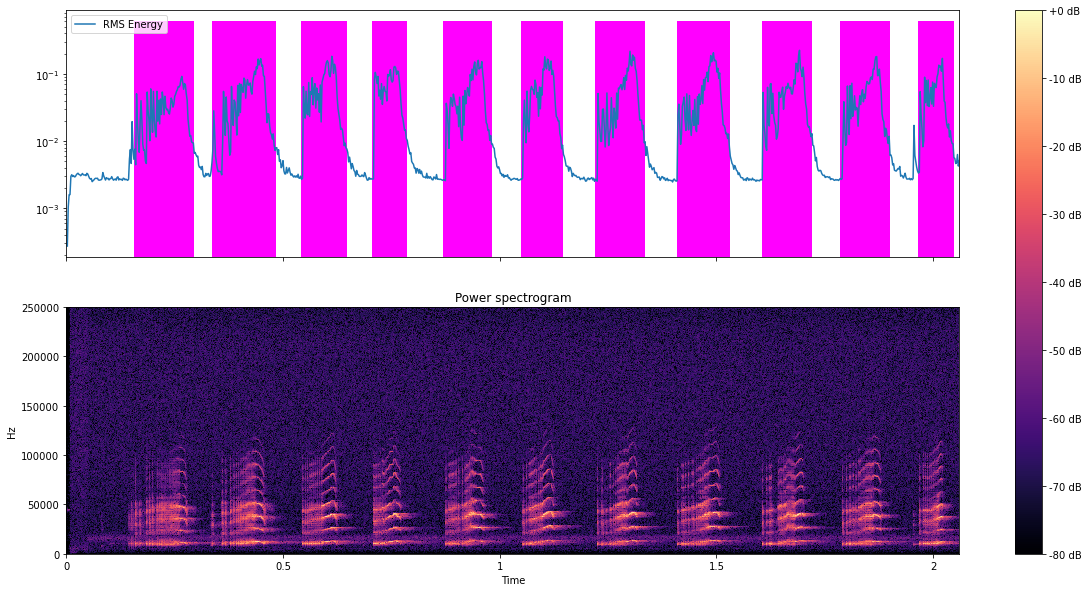

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import librosa
import librosa.display

def specshow(S):
    # plt.figure(figsize=(40, 10))
    fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 10))
    specshow_power(ax[0], non_silence_time)
    img = librosa.display.specshow(S, y_axis='linear', x_axis='time', ax=ax[1], sr=sr, hop_length=hop_length)
    ax[1].set_title('Power spectrogram')
    fig.colorbar(img, ax=ax, format="%+2.0f dB")
    plt.show()

def specshow_power(ax, non_silence):
    times = librosa.times_like(rms, sr=sr, **fft)
    ax.semilogy(times, rms[0], label='RMS Energy')
    # ax.set(xticks=times)
    ax.hlines((cut_off*2)-1, 0, max(times),colors='darkorange',linestyles="dashed",label='cut off')

    for start, end in non_silence:
        rect = patches.Rectangle((start,0), end-start, .6, linewidth=0, edgecolor='r',facecolor='magenta',)
        ax.add_patch(rect)

    # ax[0].vlines(non_silence_time[..., 0], -1, 1, label='Start', colors='red')
    # ax[0].vlines(non_silence_time[..., 1], -1, 1, label='End', colors='magenta')
    ax.legend()
    ax.label_outer()

def specshow2(non_silence, top_db):
    fig, ax = plt.subplots(nrows=1, figsize=(20, 8))
    ax.set_title(f'top_db: {top_db}')
    specshow_power(ax, non_silence)
    plt.show()

y, sr = librosa.load('../data/audio/simpleCall/B2_C_TR_Jt5_16_07_10_034.wav', sr=500000)
y_db =librosa.amplitude_to_db(abs(y))

cut_off = .30
n_fft = 2048
hop_length = n_fft//2
fft = {'n_fft': n_fft, 'hop_length': hop_length}


S = librosa.stft(y, **fft)
rms = librosa.feature.rms(S=S)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

# specshow(librosa.amplitude_to_db(S, ref=np.max))

max_db = np.max(abs(S_db))
print(max_db)


non_silence = librosa.effects.split(y, top_db=max_db*cut_off, frame_length=n_fft*4, hop_length=hop_length*4)
non_silence_time = librosa.samples_to_time(non_silence, sr=sr)
specshow(S_db)

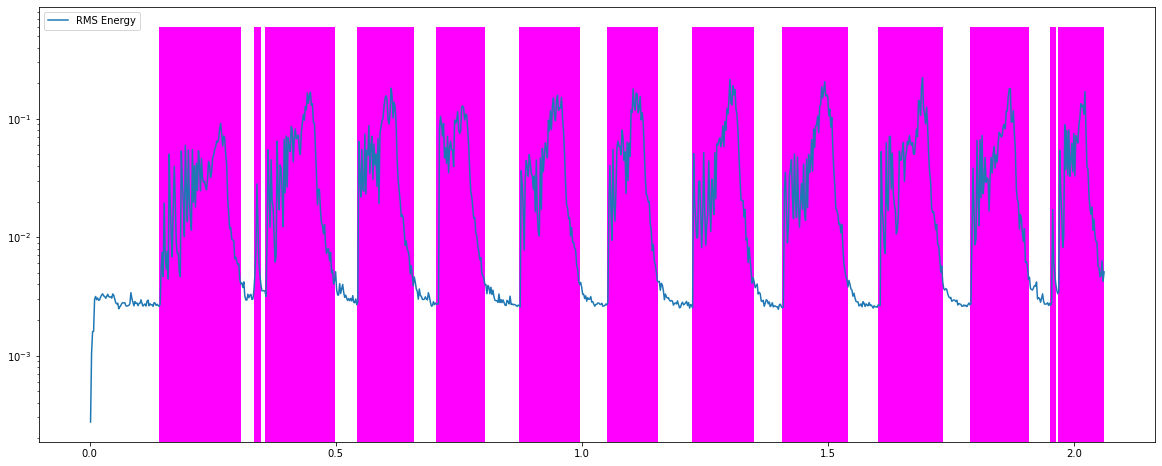

In [16]:
non_silence = librosa.effects.split(y, top_db=max_db*0.41, frame_length=n_fft*2, hop_length=hop_length)
non_silence_time = librosa.samples_to_time(non_silence, sr=sr)
specshow2(non_silence_time)

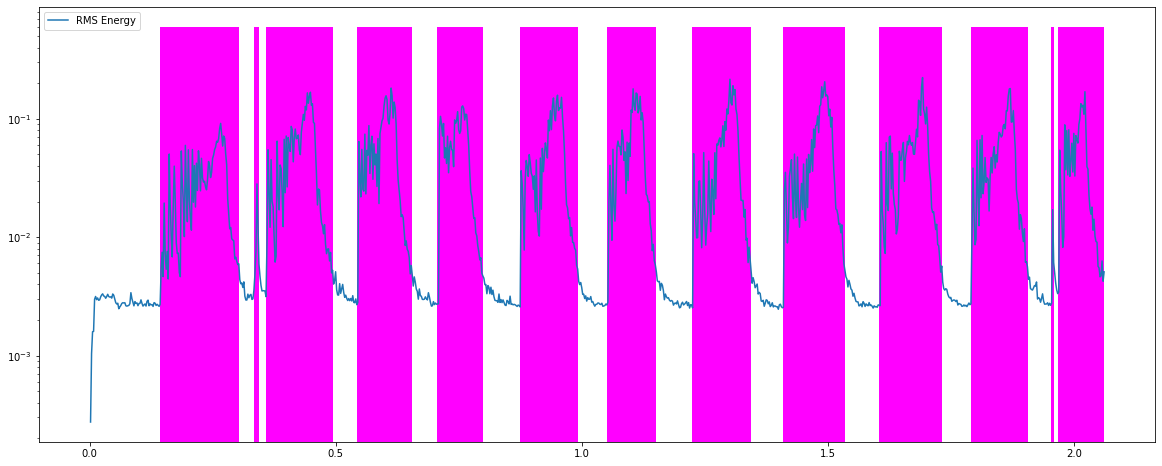

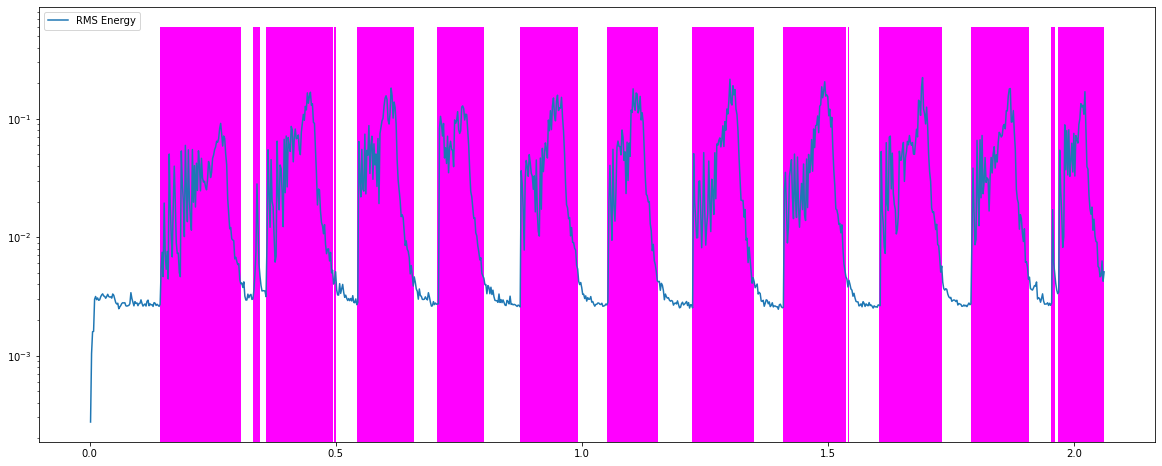

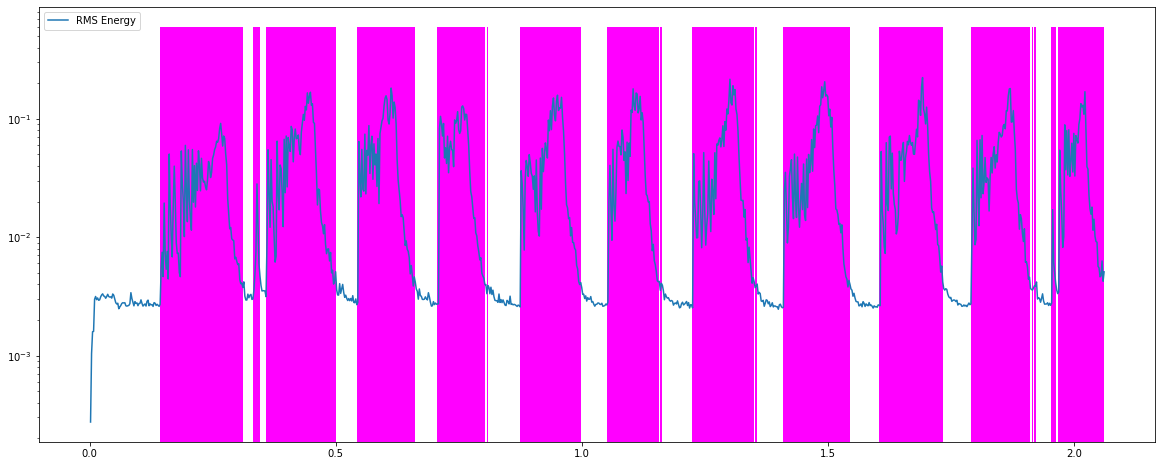

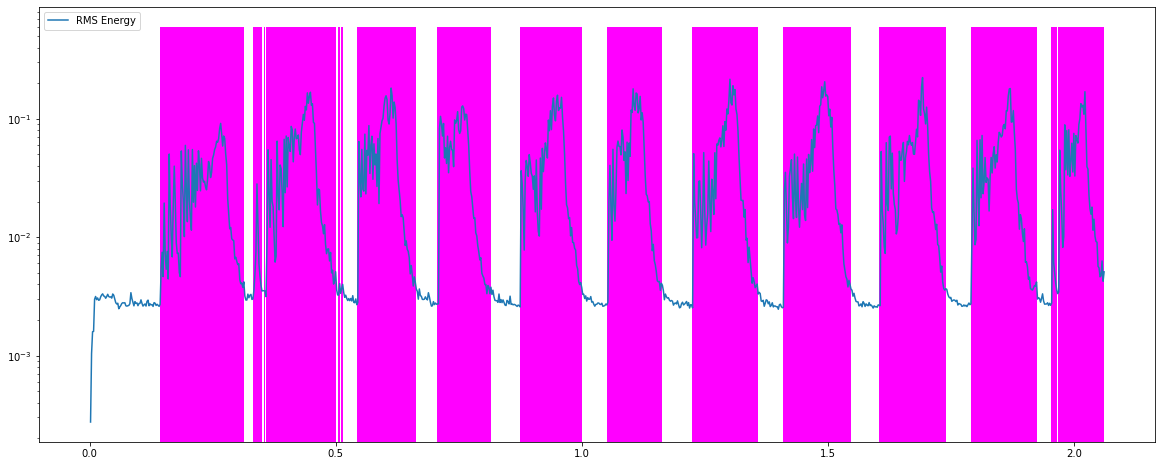

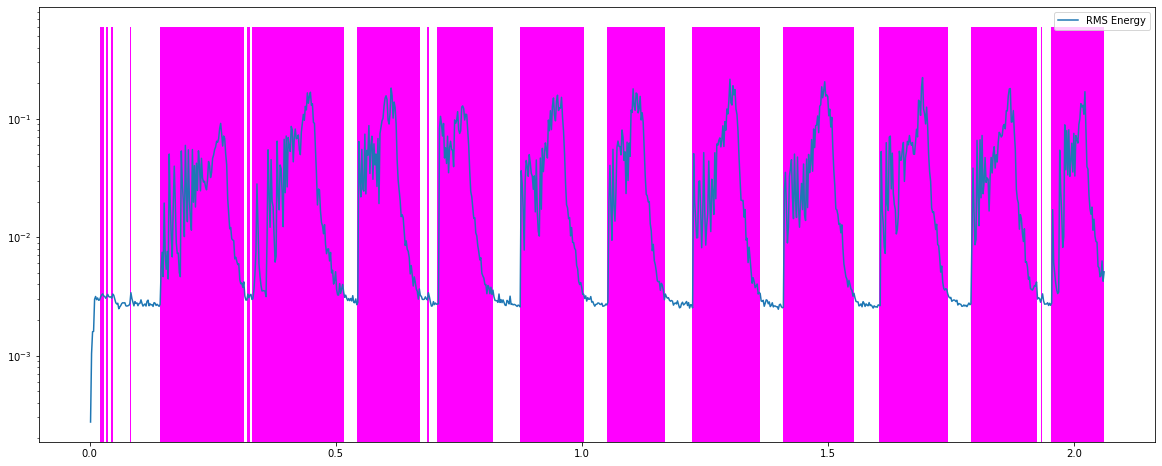

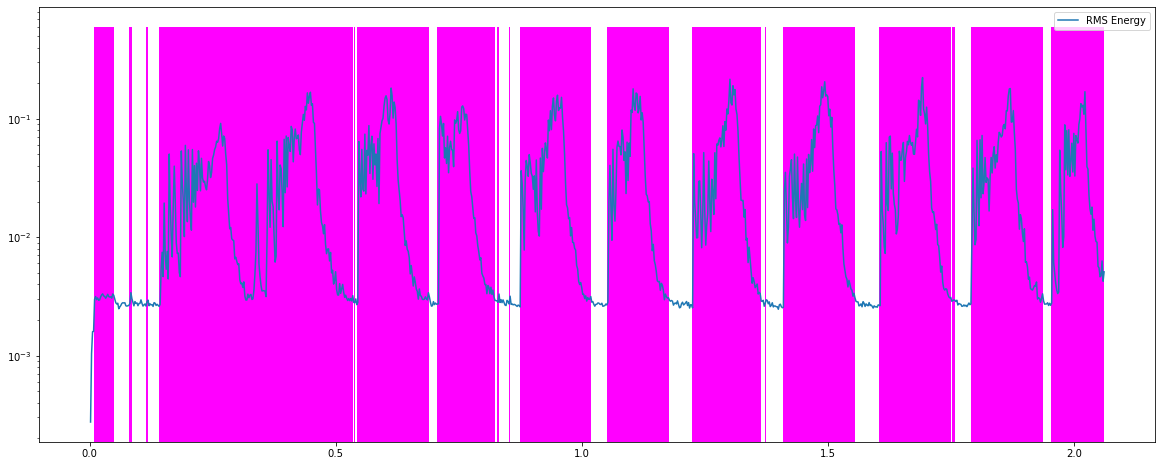

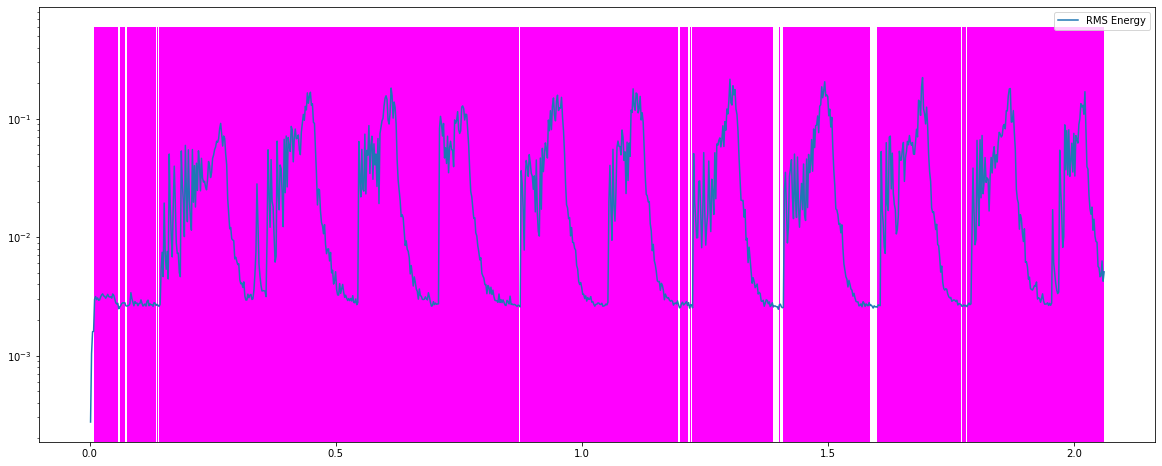

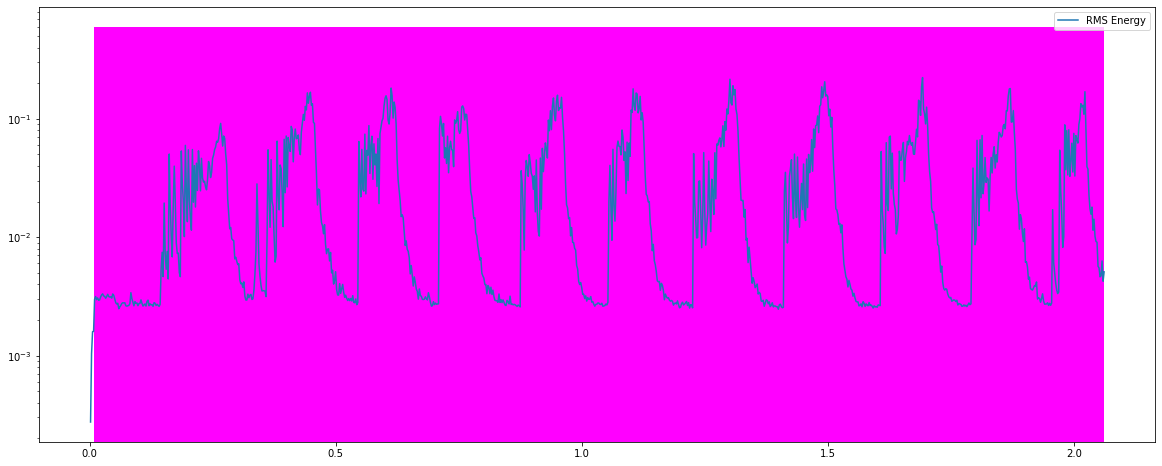

In [17]:
for _cut_off in range(41, 49, 1):
    non_silence = librosa.effects.split(y, top_db=max_db*(_cut_off/100), frame_length=n_fft, hop_length=int(hop_length/2))
    non_silence_time = librosa.samples_to_time(non_silence, sr=sr)
    specshow2(non_silence_time)

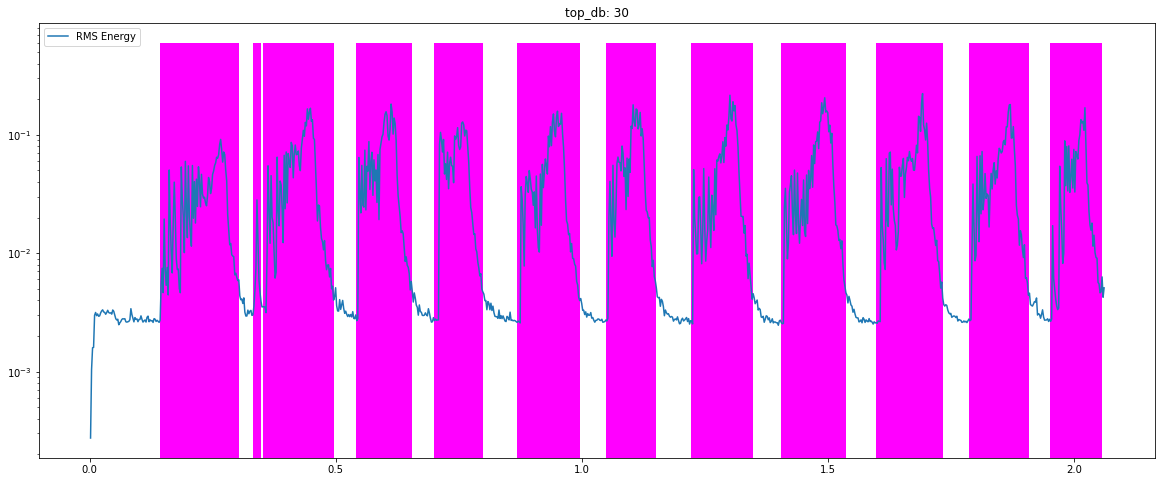

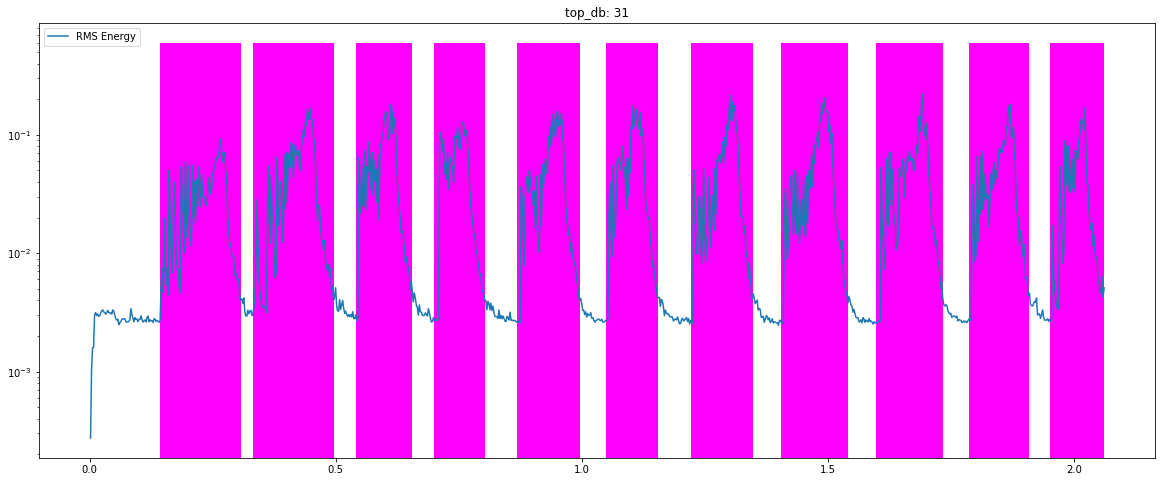

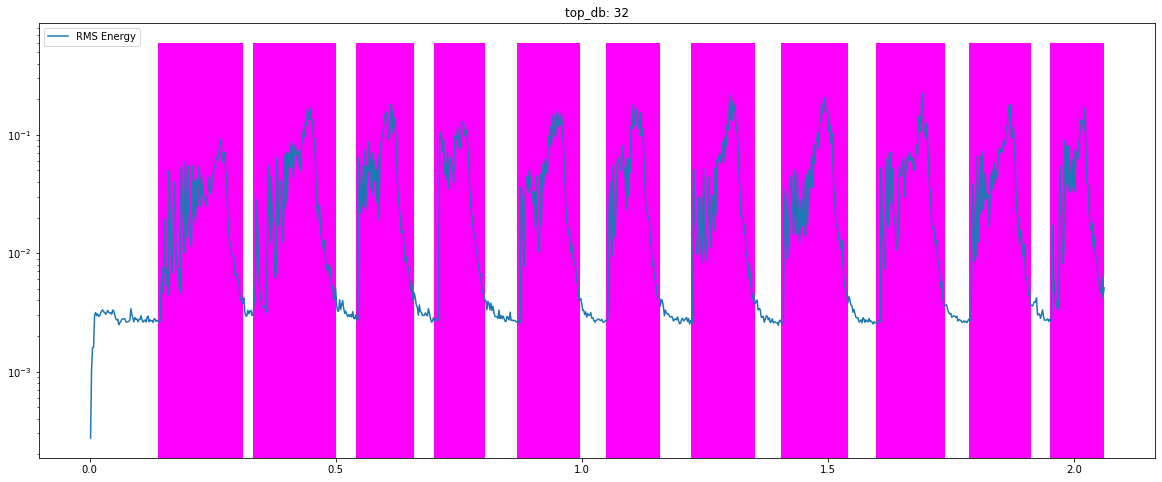

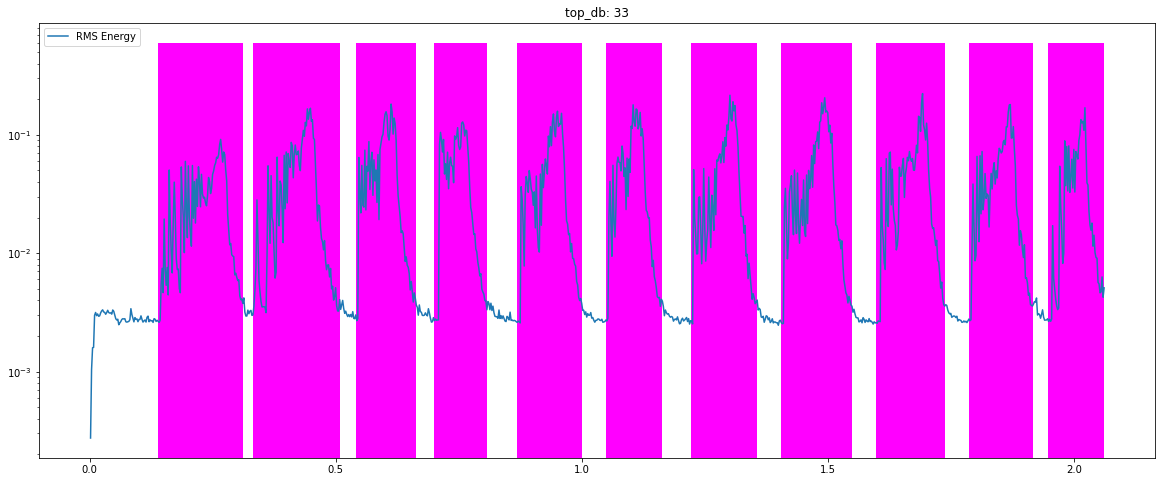

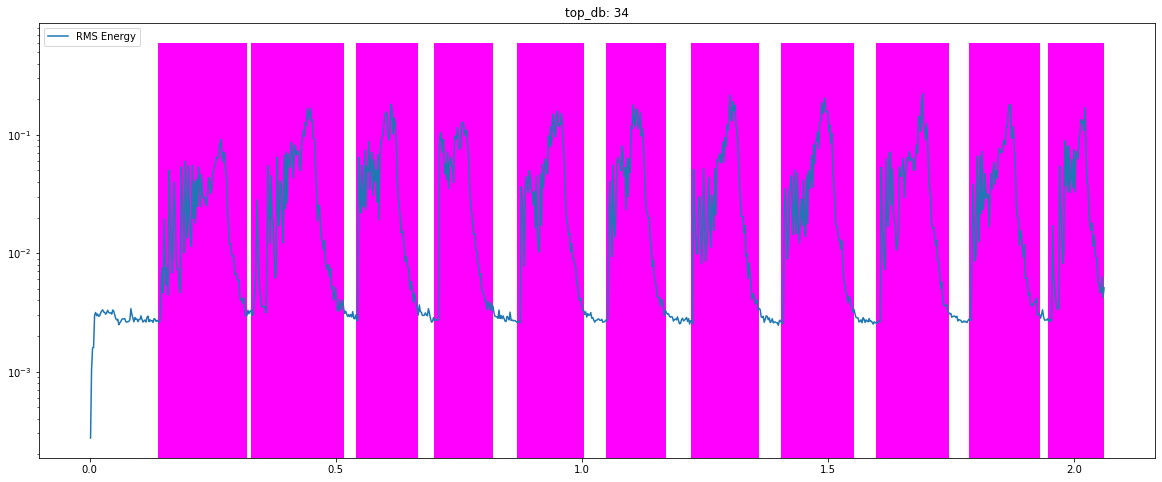

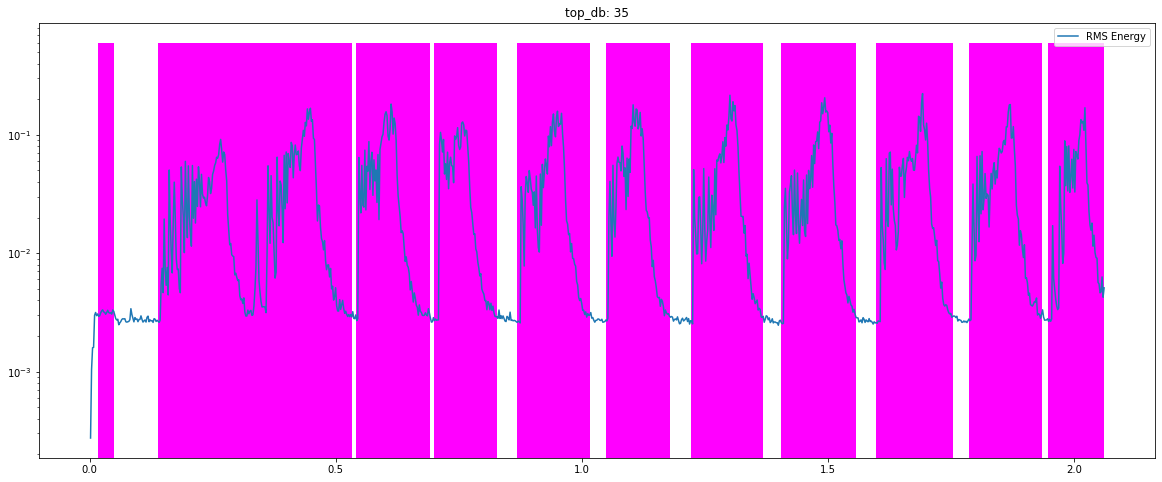

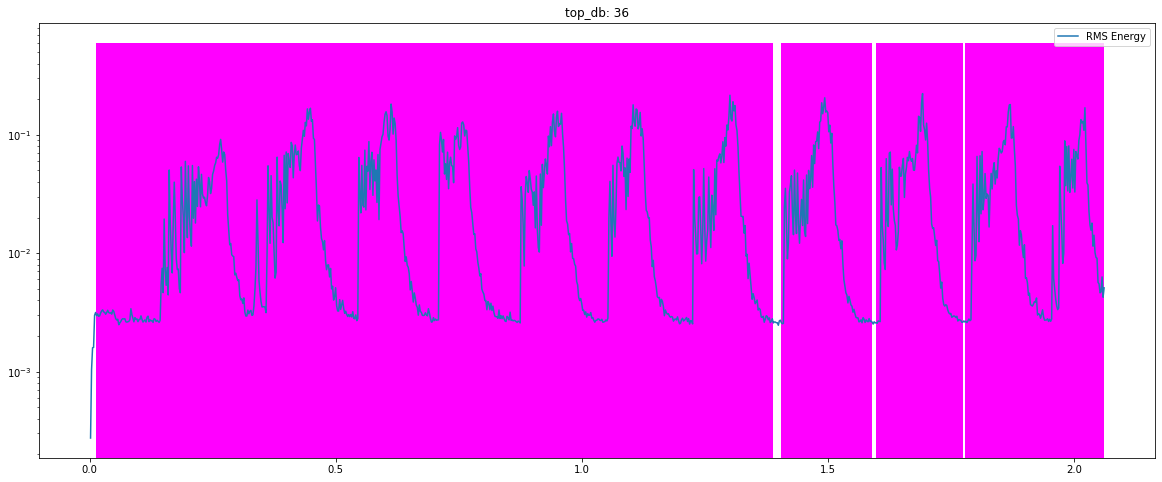

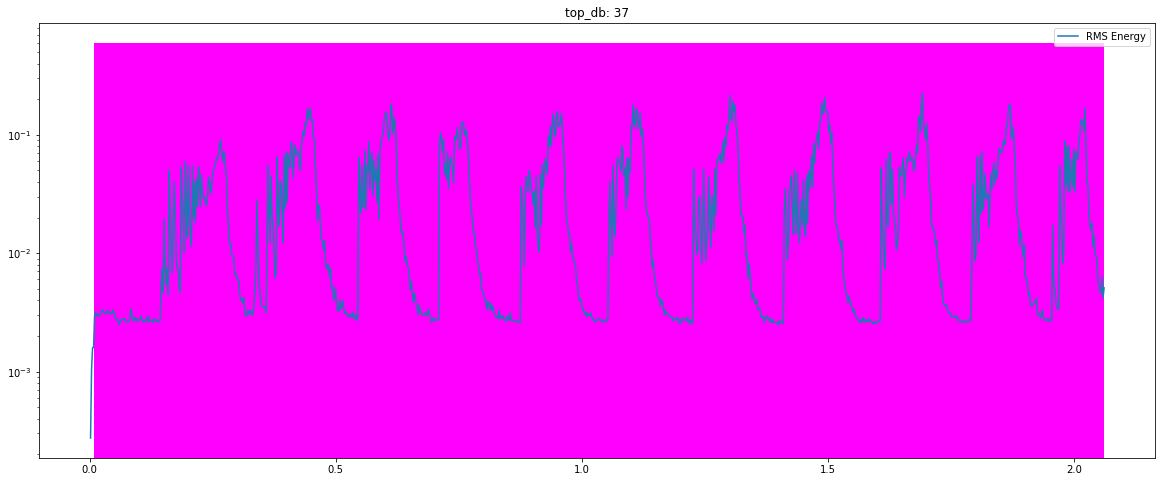

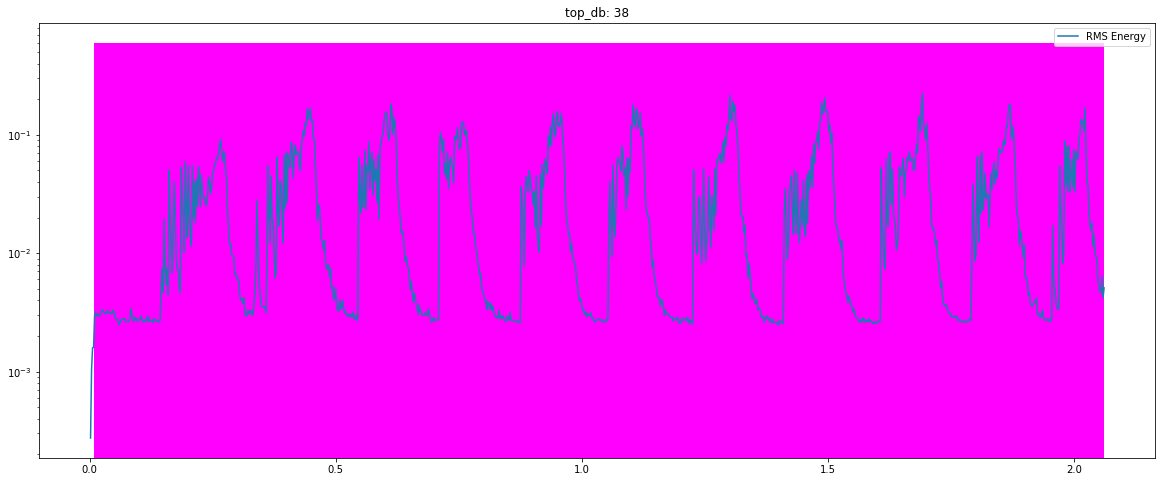

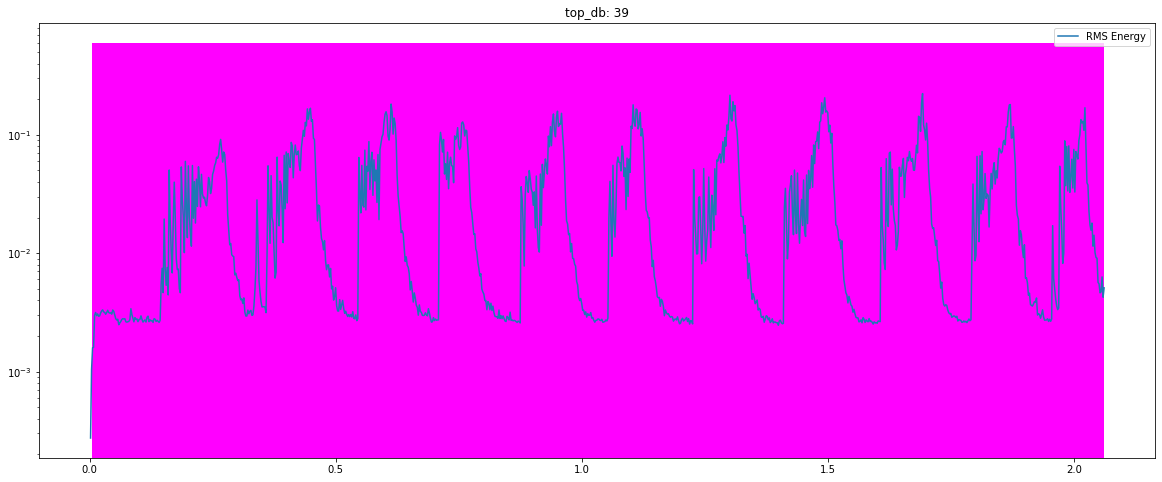

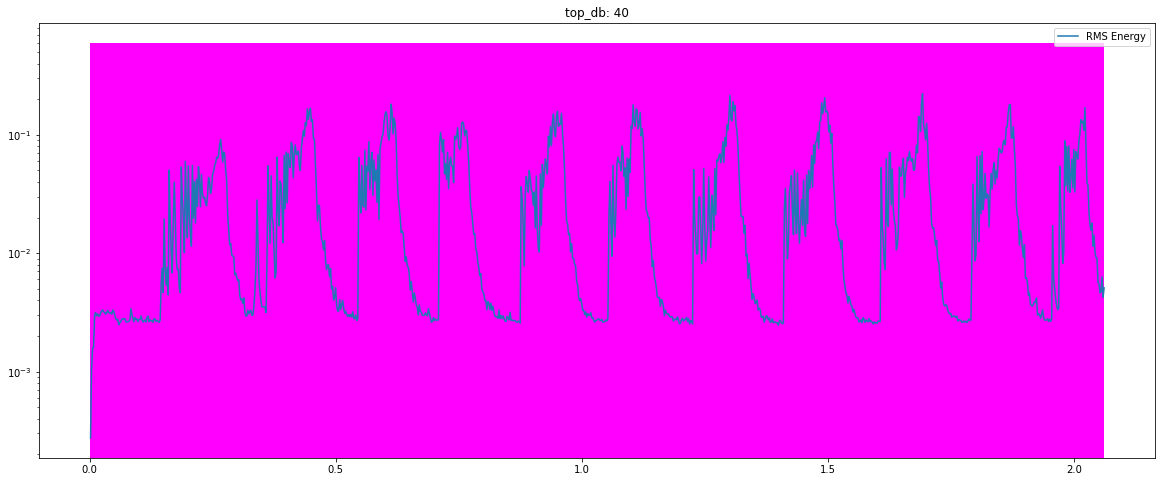

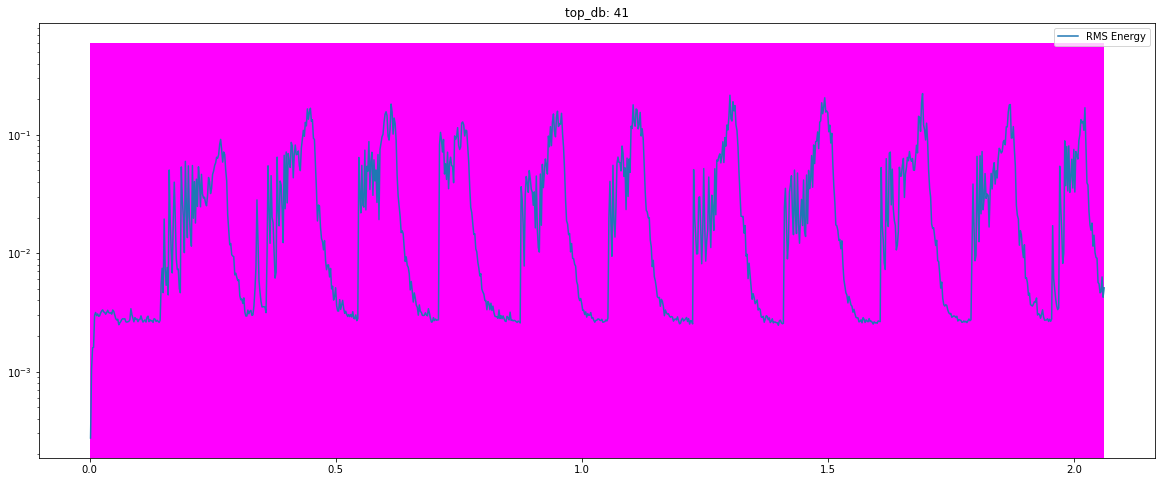

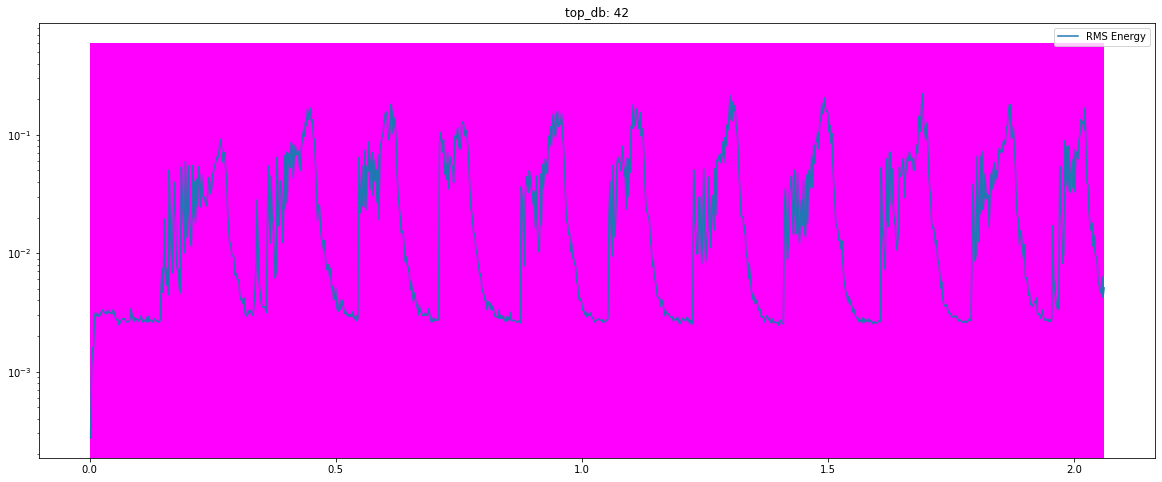

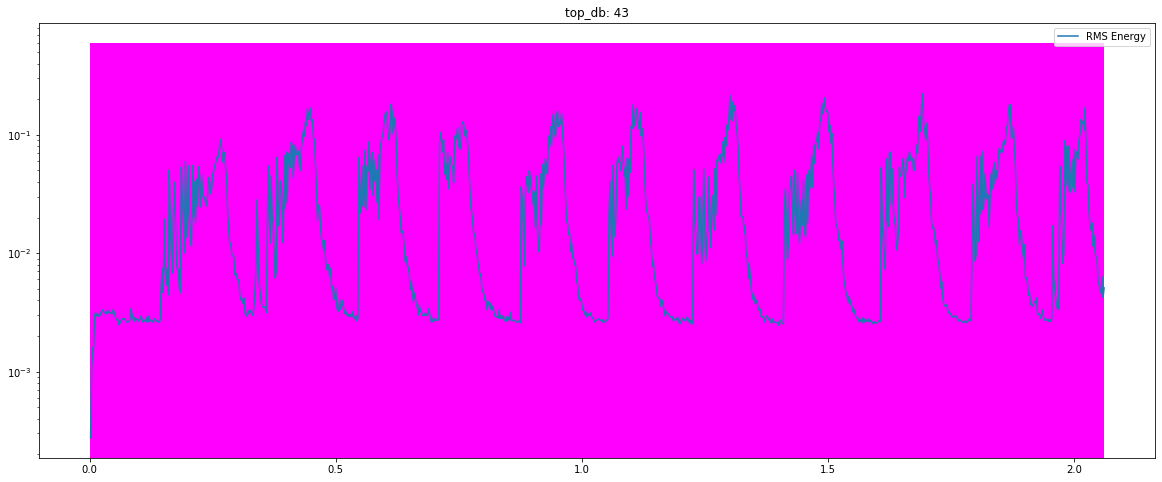

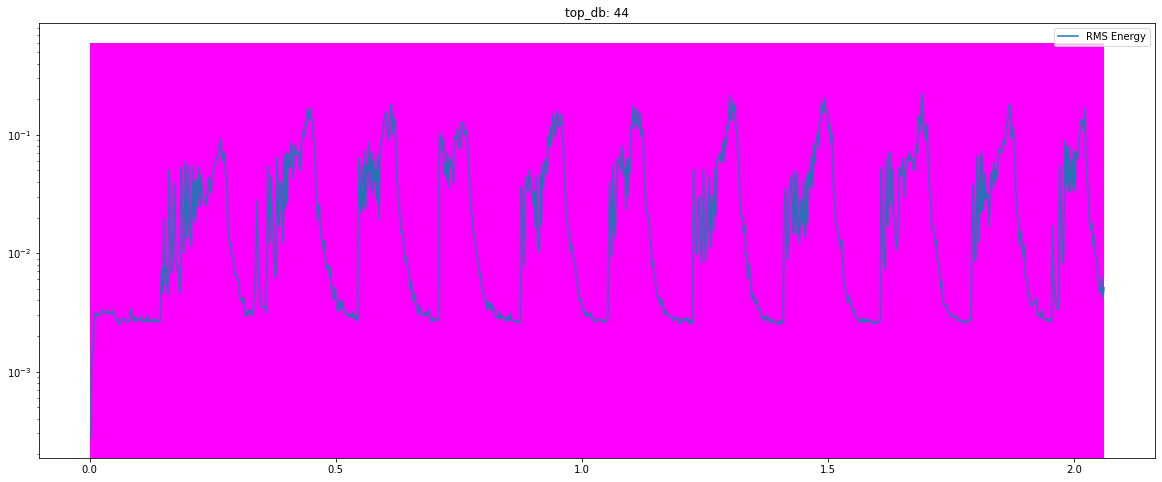

In [24]:
for top_db in range(30, 45, 1):
    non_silence = librosa.effects.split(y, top_db=top_db, frame_length=n_fft*4, hop_length=hop_length*2)
    non_silence_time = librosa.samples_to_time(non_silence, sr=sr)
    specshow2(non_silence_time, top_db)

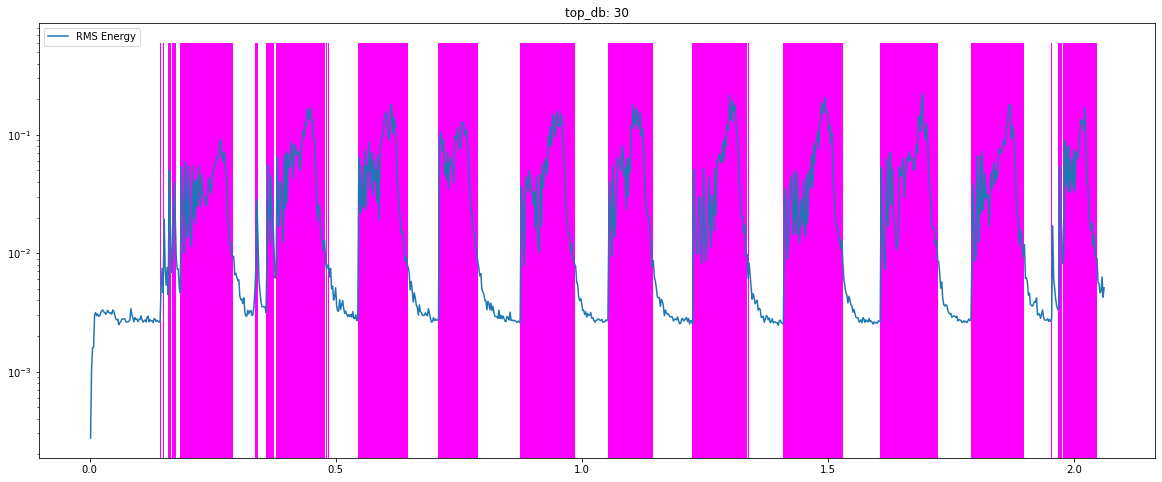

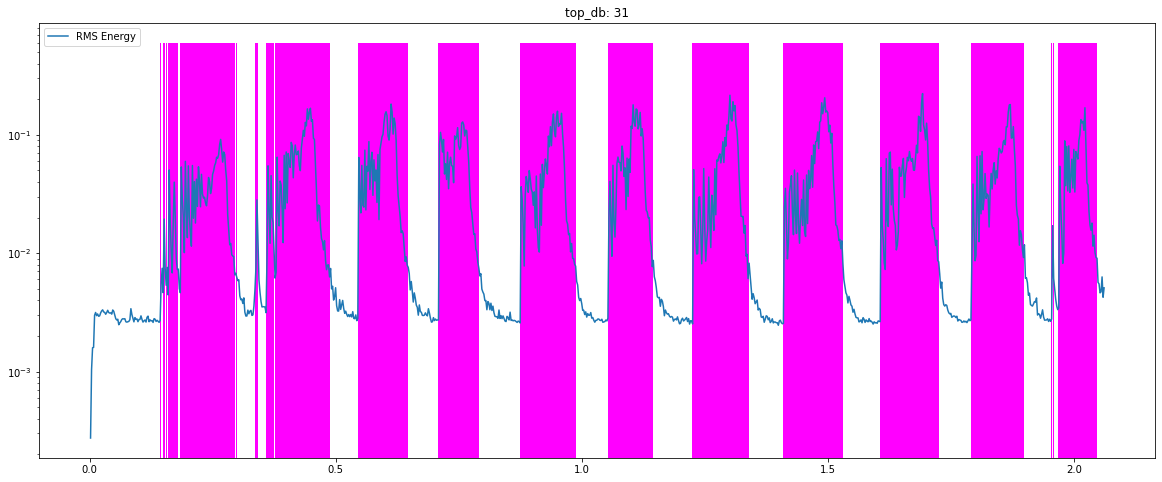

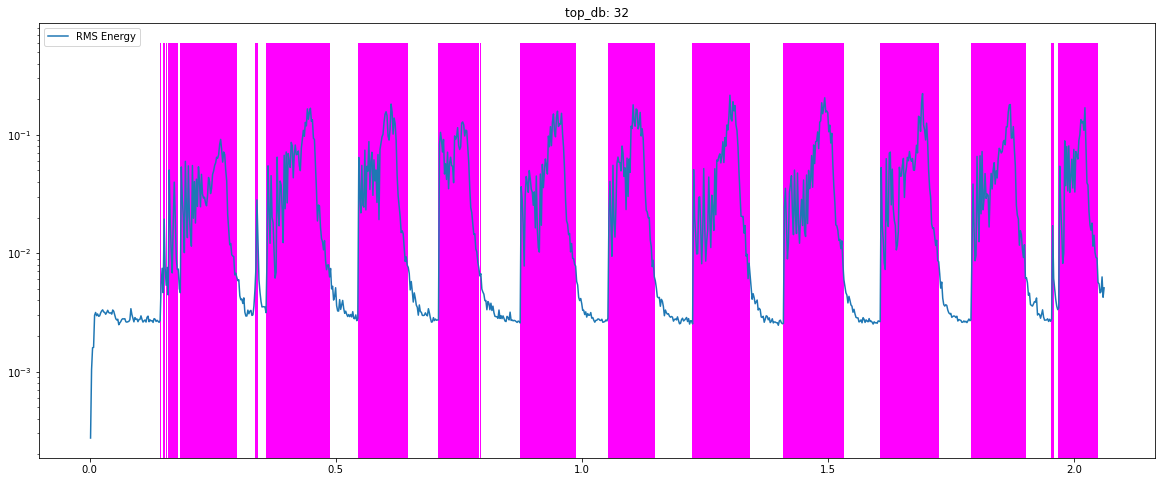

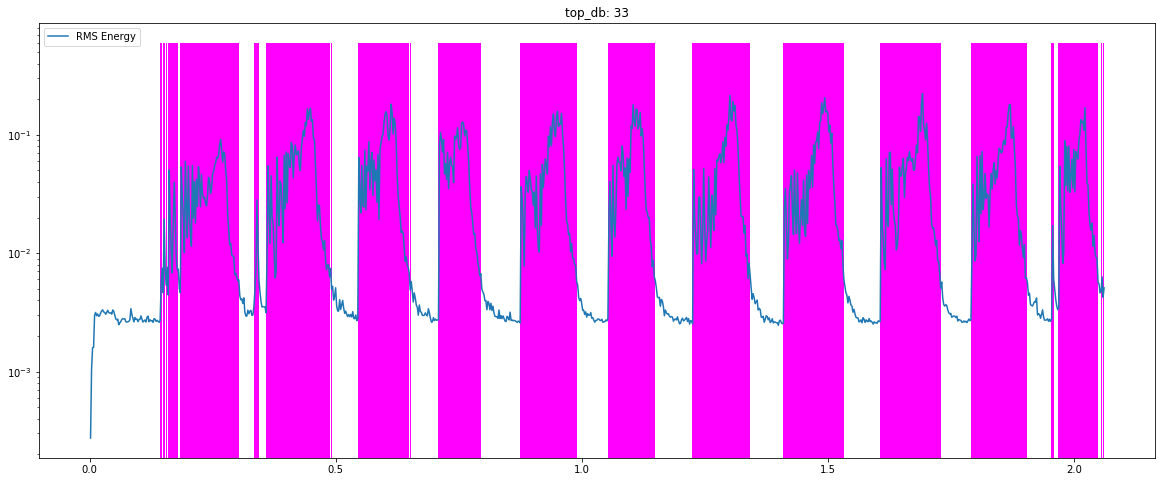

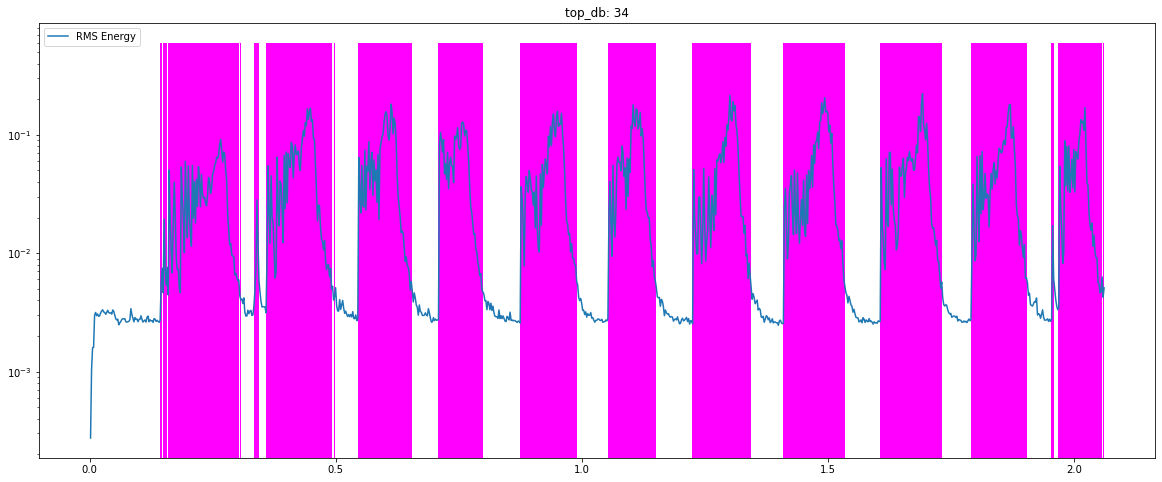

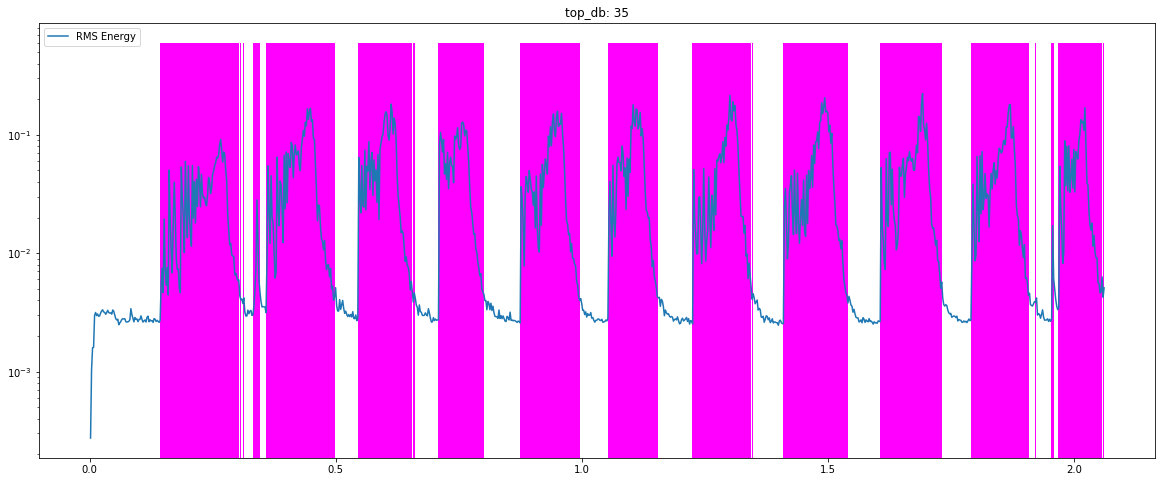

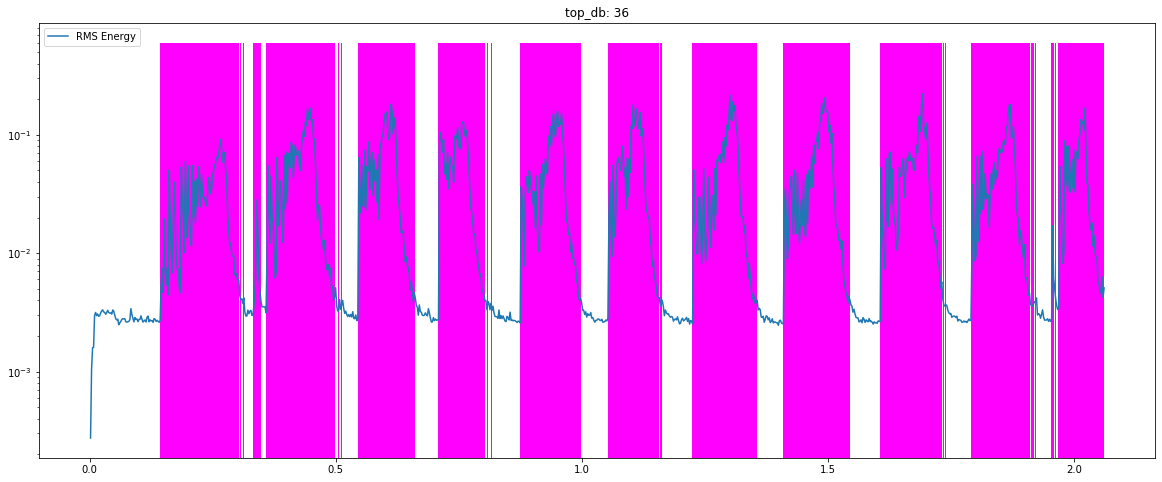

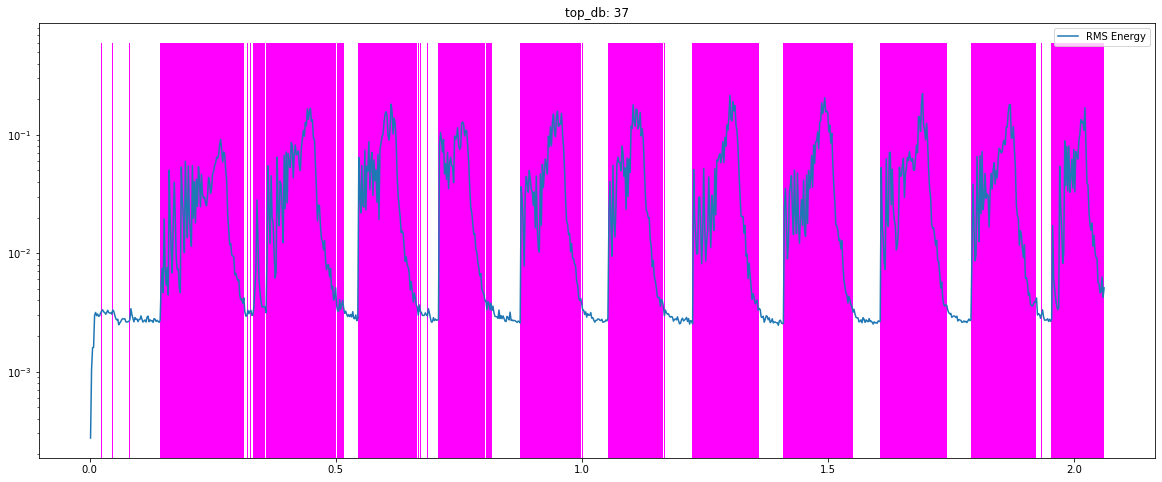

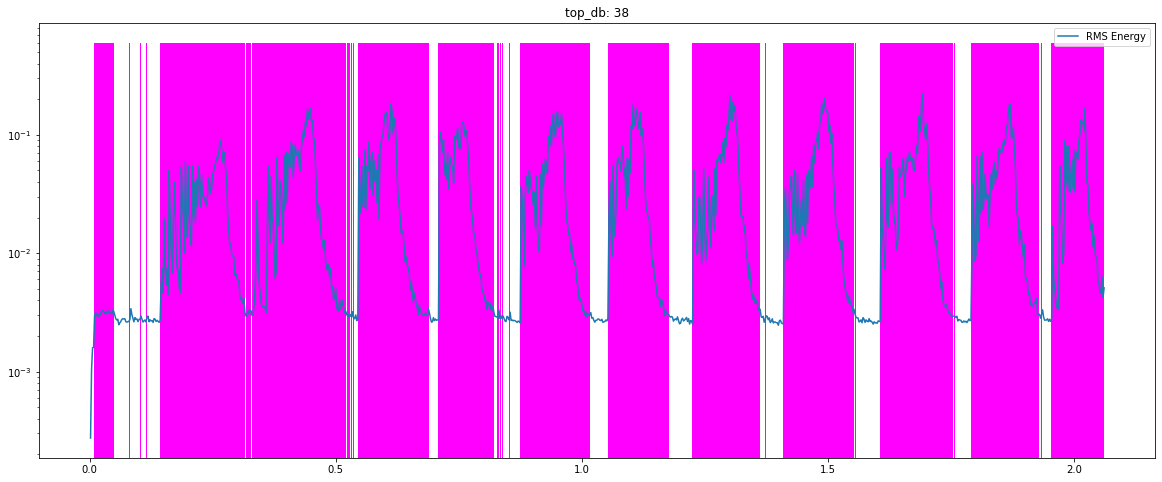

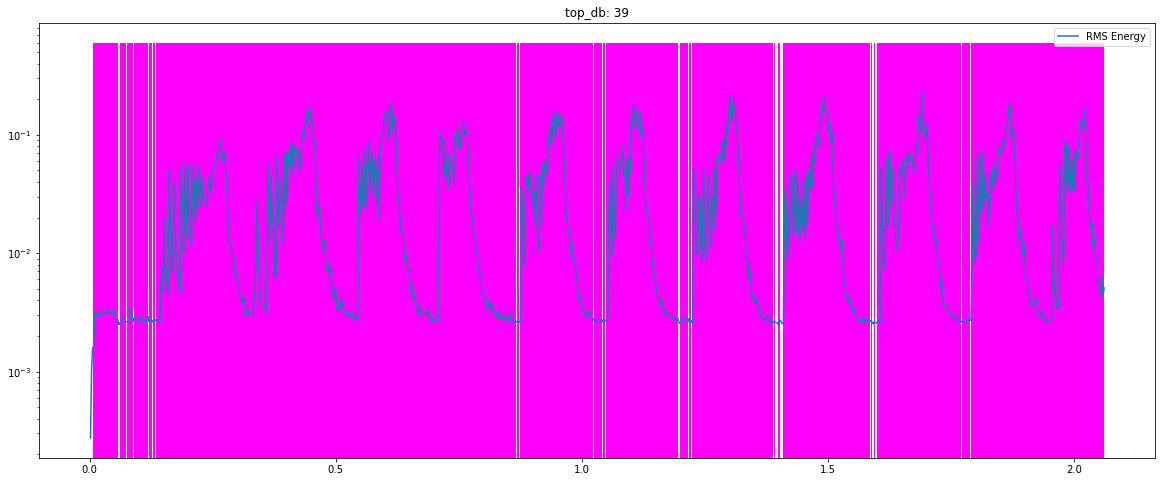

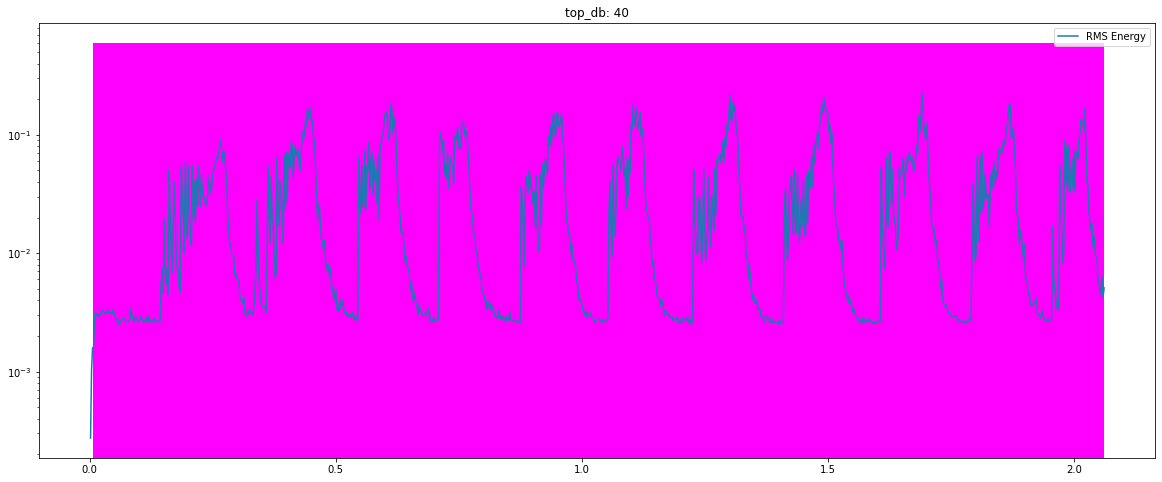

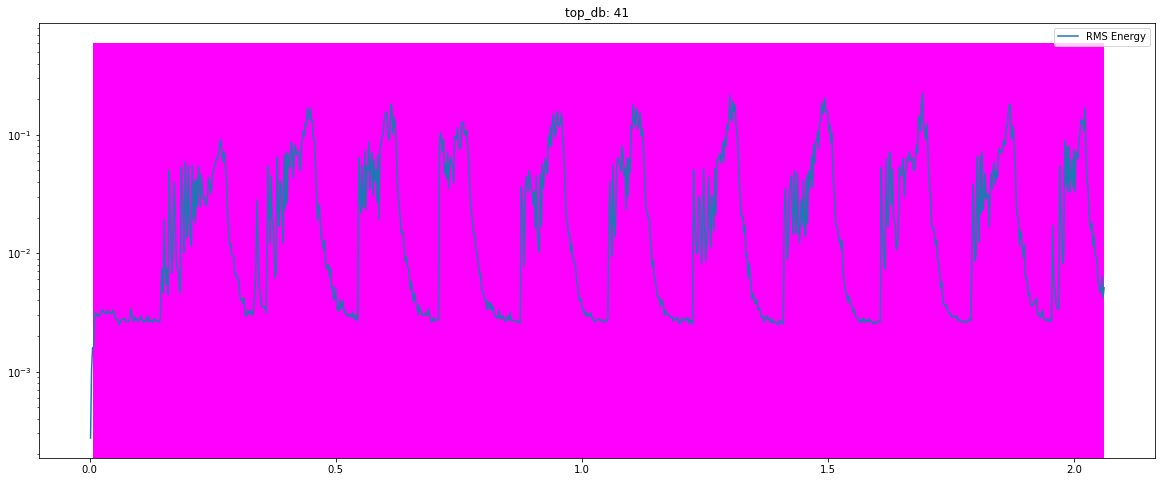

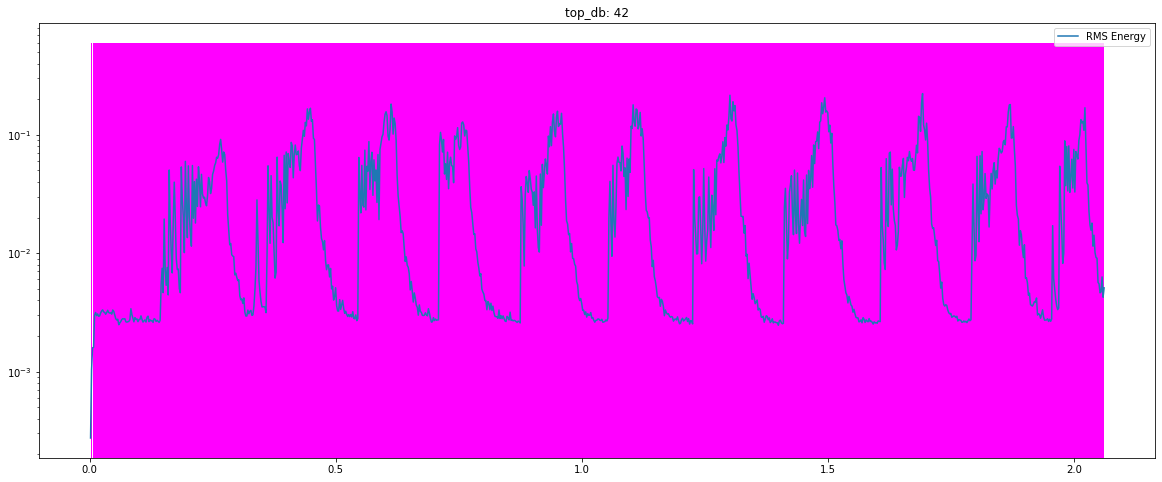

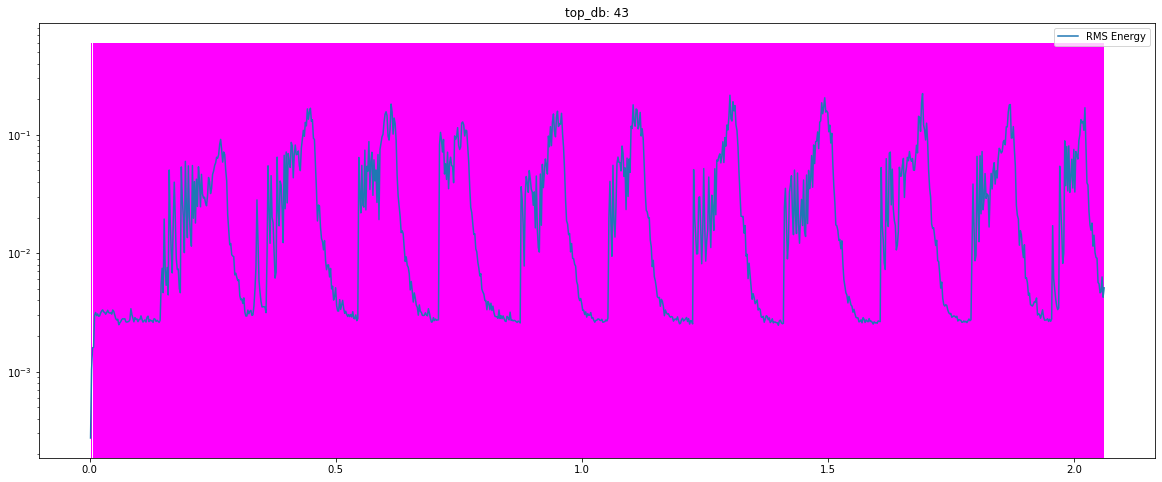

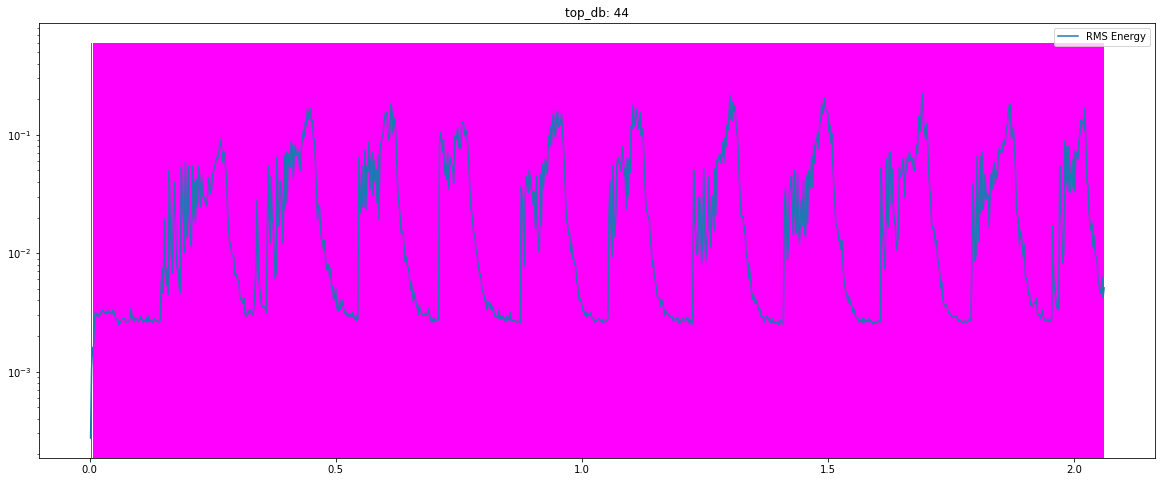

In [23]:
for top_db in range(30, 45, 1):
    non_silence = librosa.effects.split(y, top_db=top_db, frame_length=1024, hop_length=256)
    non_silence_time = librosa.samples_to_time(non_silence, sr=sr)
    specshow2(non_silence_time, top_db)
#
# for i in non_silence:
#     displayTime(i[0],i[1])

In [29]:
times = librosa.times_like(rms, sr=sr, **fft)

%USERPROFILE%\scoop\apps\miniconda3\current\envs\bat_syllable_classifier\lib\site-packages\librosa\display.py:822: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(
%USERPROFILE%\scoop\apps\miniconda3\current\envs\bat_syllable_classifier\lib\site-packages\librosa\display.py:822: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(
%USERPROFILE%\scoop\apps\miniconda3\current\envs\bat_syllable_classifier\lib\site-packages\librosa\display.py:822: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(
%USERPROFILE%\scoop\apps\miniconda3\current\envs\bat_syllable_classifier\lib\site-packages\librosa\display.py:822: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(
%USERPROFILE%\scoop\apps\miniconda3\current\envs\bat_syllable_classifier\lib\site-packages\librosa\display.py:822: UserWarning: Trying to display comple

B2_C_B_Jt1_16_07_06_042
117.1411
25.906317
B2_C_TR_Jt1_16_06_02_018
129.35698
20.502512
B2_C_TR_Jt2_16_06_02_044
126.405304
19.860823
B2_C_TR_Jt5_16_07_10_034
144.40028
27.113327
B3_C_B_Jt1_16_07_06_042
134.97128
100.0
B4_C_TR_Jt1_16_06_02_108
129.35698
20.502512
B4_C_TR_Jt2_16_06_02_044
124.36952
20.121124
C_TO_Jt1_16_06_20_015
137.71982
25.453644
C_TO_Jt1_16_06_20_029
115.84814
23.761848
C_TO_Jt2_16_06_12_018
132.77321
25.79694
C_TO_Jt2_16_06_18_005
117.32381
22.350365
C_TO_Jt2_16_06_20_018
129.06374
25.543306


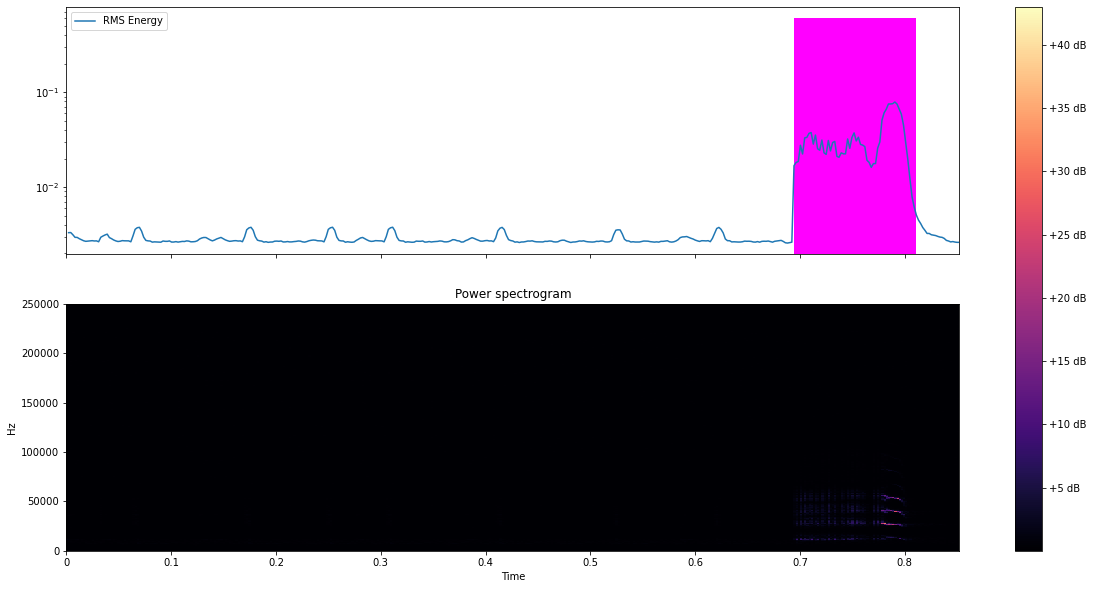

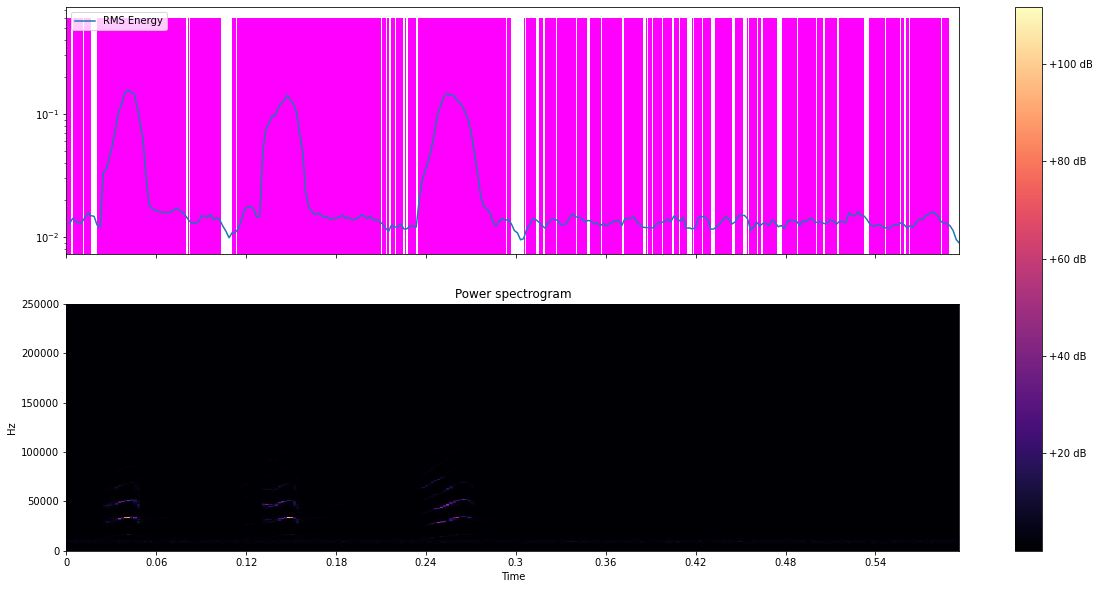

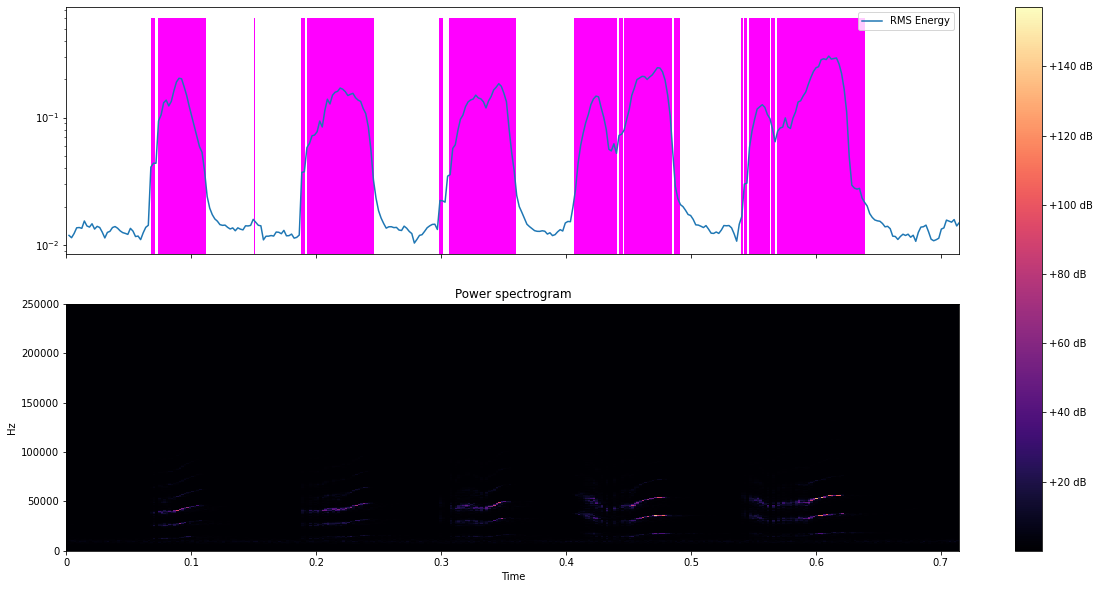

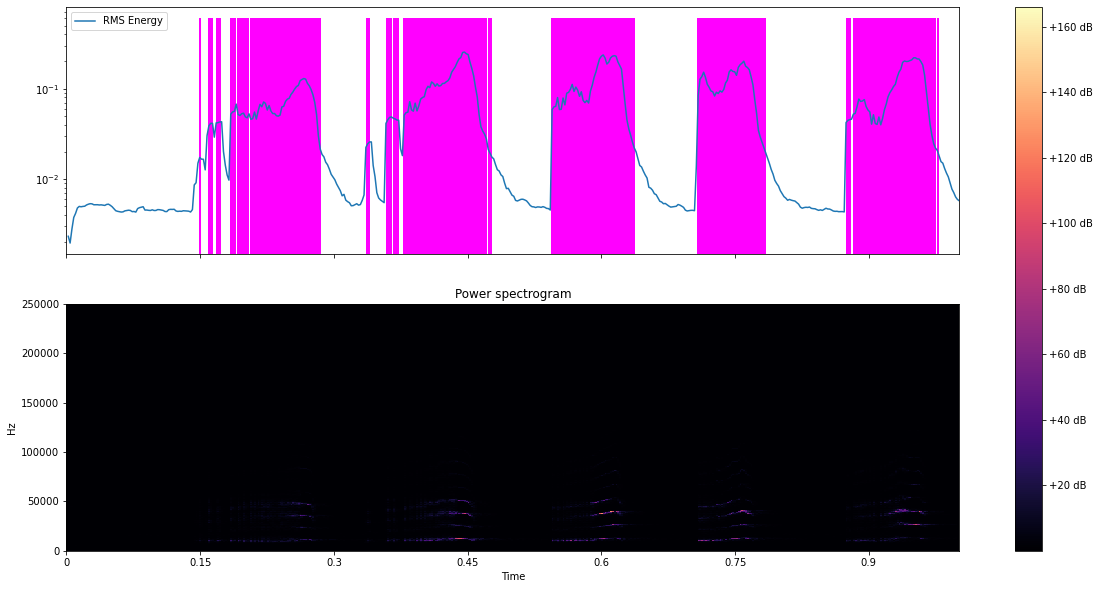

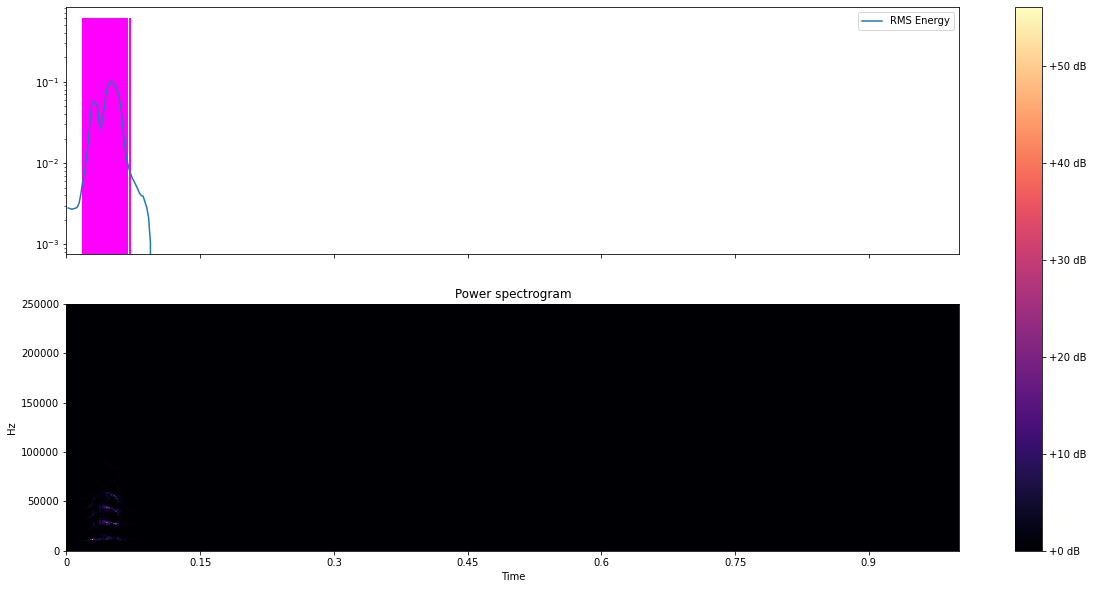

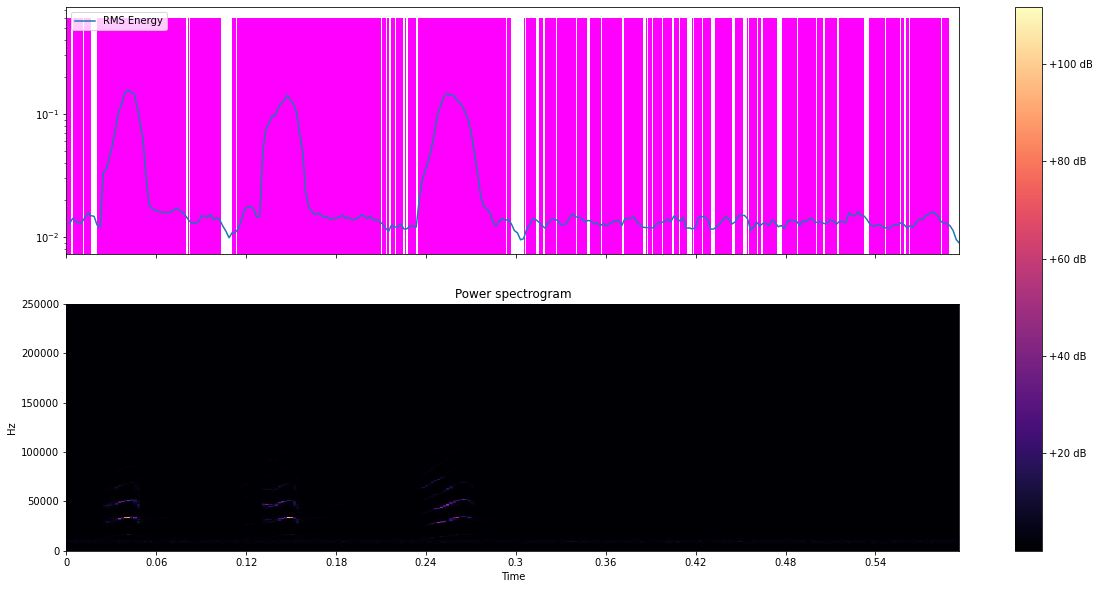

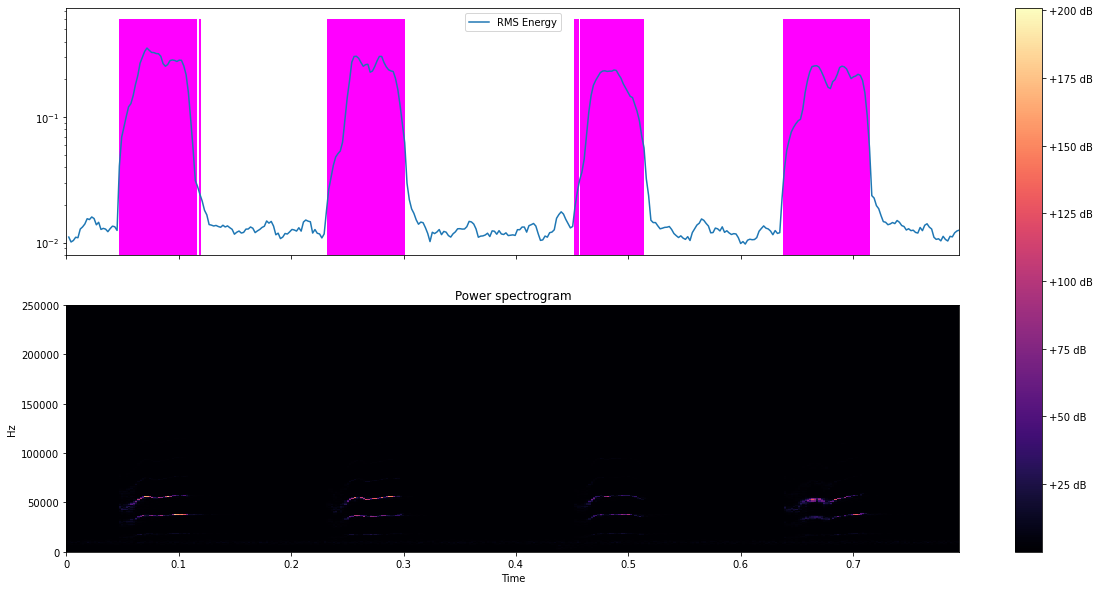

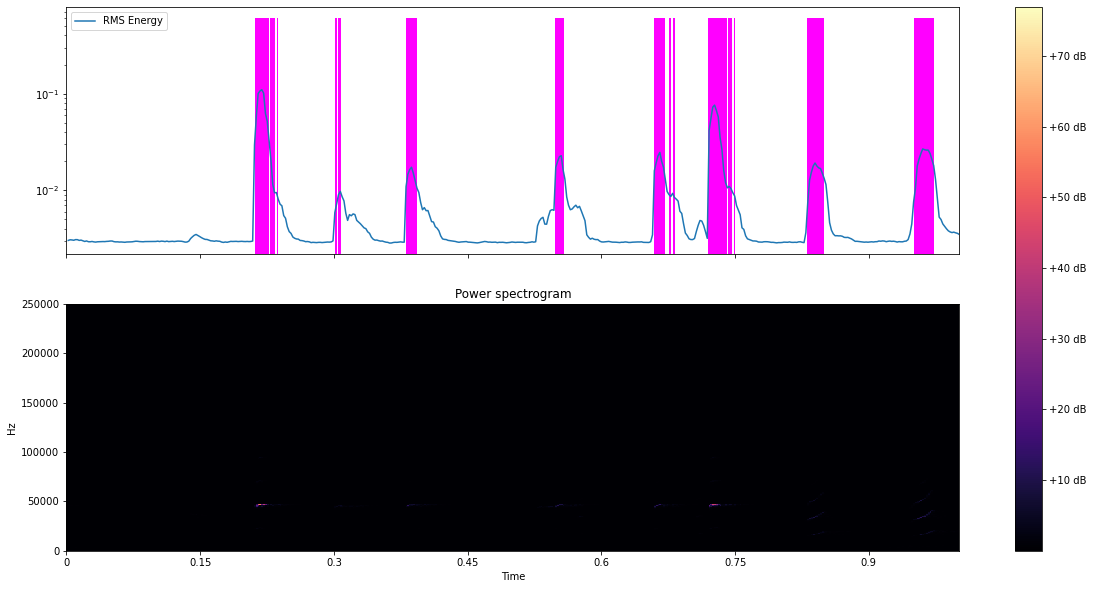

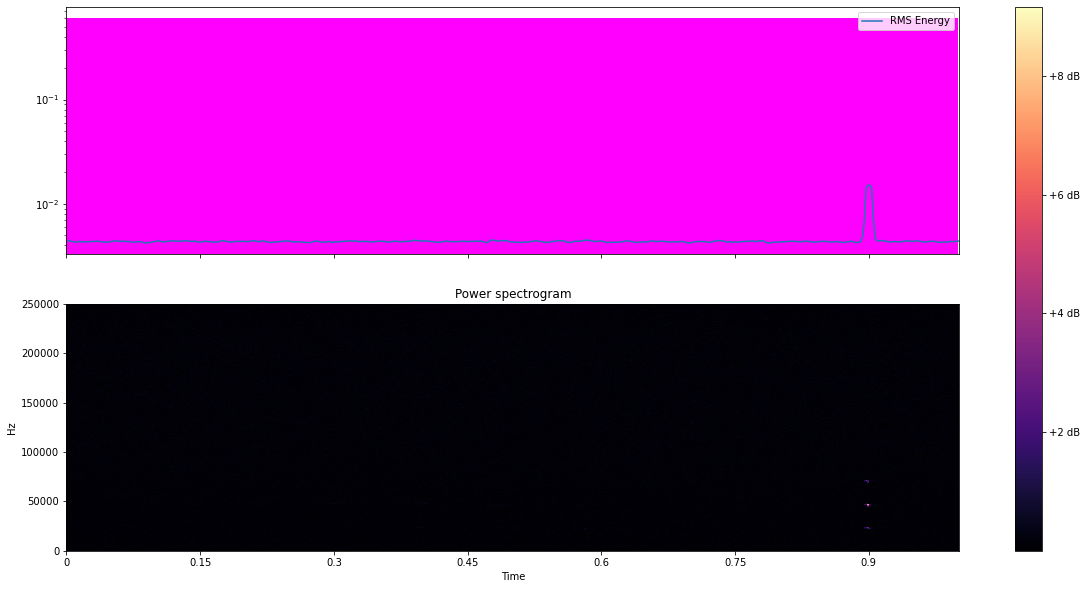

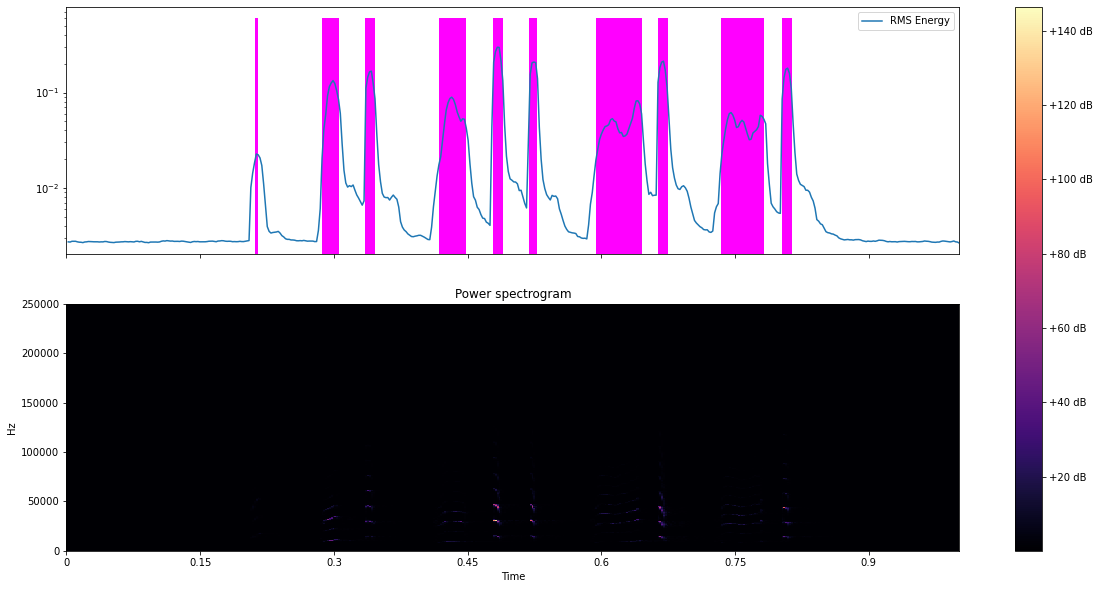

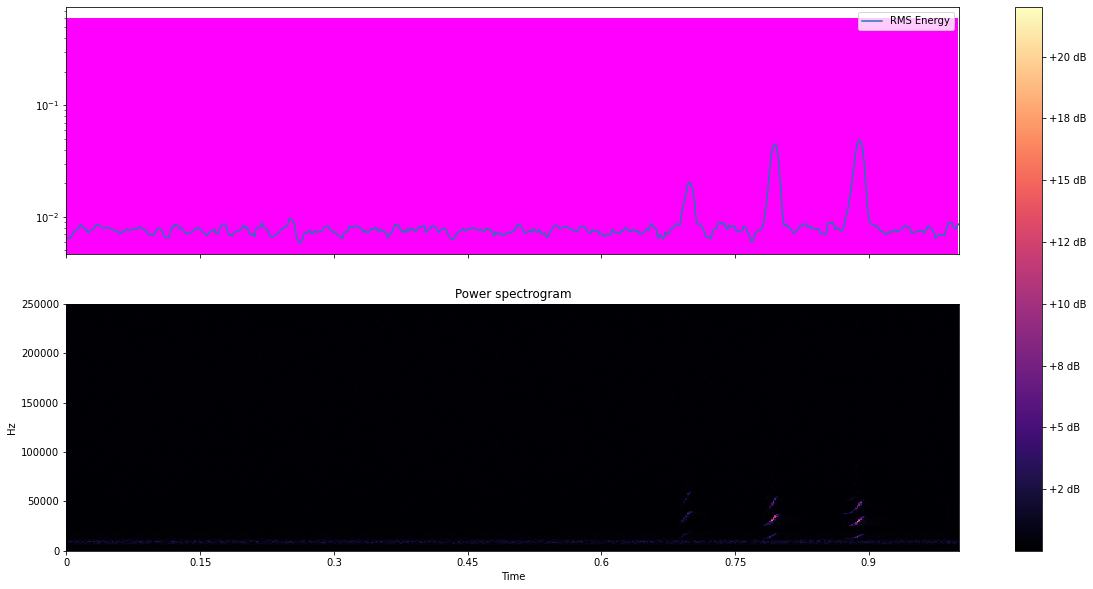

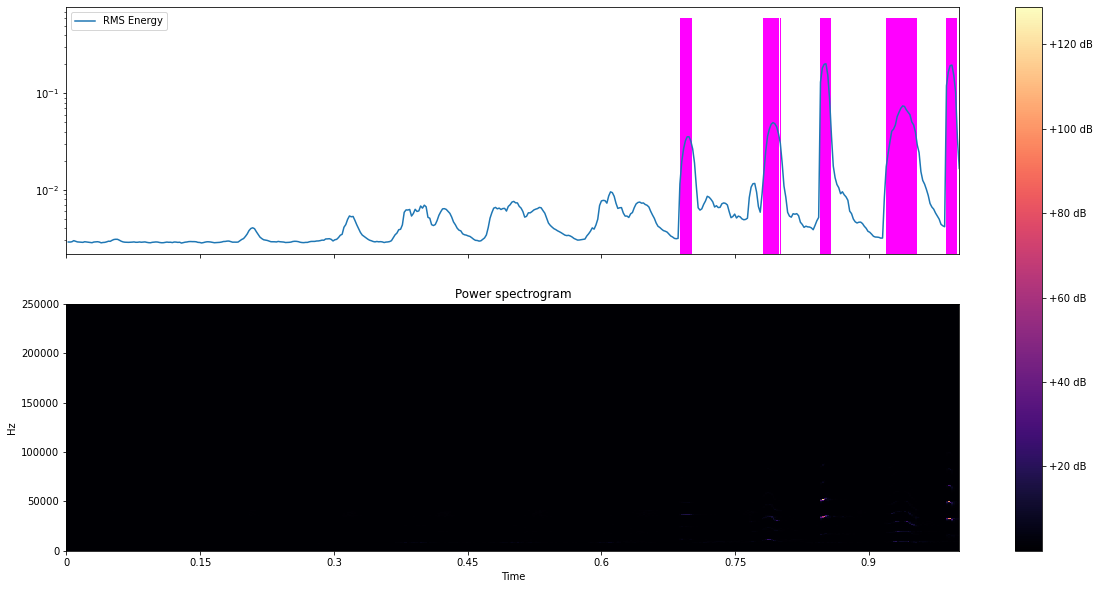

In [103]:
from pathlib import Path

i = 0
for file in Path('../data/audio/simpleCall/').glob("*.wav"):
    librosa.cache.clear()
    print(file.stem)
    y, sr = librosa.load(file, sr=500000, duration=1)
    S = librosa.stft(y, **fft)
    print(np.max(np.abs(librosa.amplitude_to_db(np.abs(S), ref=np.max, top_db=None))))
    rms = librosa.feature.rms(y=y, frame_length=4069, hop_length=1024)
    print(np.max(np.abs(librosa.power_to_db(rms, top_db=None, ref=1.0))))

    non_silence = librosa.effects.split(y, top_db=25, frame_length=1024, hop_length=128)
    non_silence_time = librosa.samples_to_time(non_silence, sr=sr)
    specshow(S)
    if i > 10:
        break
    i+= 1

%USERPROFILE%\scoop\apps\miniconda3\current\envs\bat_syllable_classifier\lib\site-packages\librosa\display.py:822: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(
%USERPROFILE%\scoop\apps\miniconda3\current\envs\bat_syllable_classifier\lib\site-packages\librosa\display.py:822: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(
%USERPROFILE%\scoop\apps\miniconda3\current\envs\bat_syllable_classifier\lib\site-packages\librosa\display.py:822: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(
%USERPROFILE%\scoop\apps\miniconda3\current\envs\bat_syllable_classifier\lib\site-packages\librosa\display.py:822: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(
%USERPROFILE%\scoop\apps\miniconda3\current\envs\bat_syllable_classifier\lib\site-packages\librosa\display.py:822: UserWarning: Trying to display comple

117.1411
129.35698
126.405304
144.40028
134.97128
129.35698
124.36952
137.71982
115.84814
132.77321
117.32381
129.06374


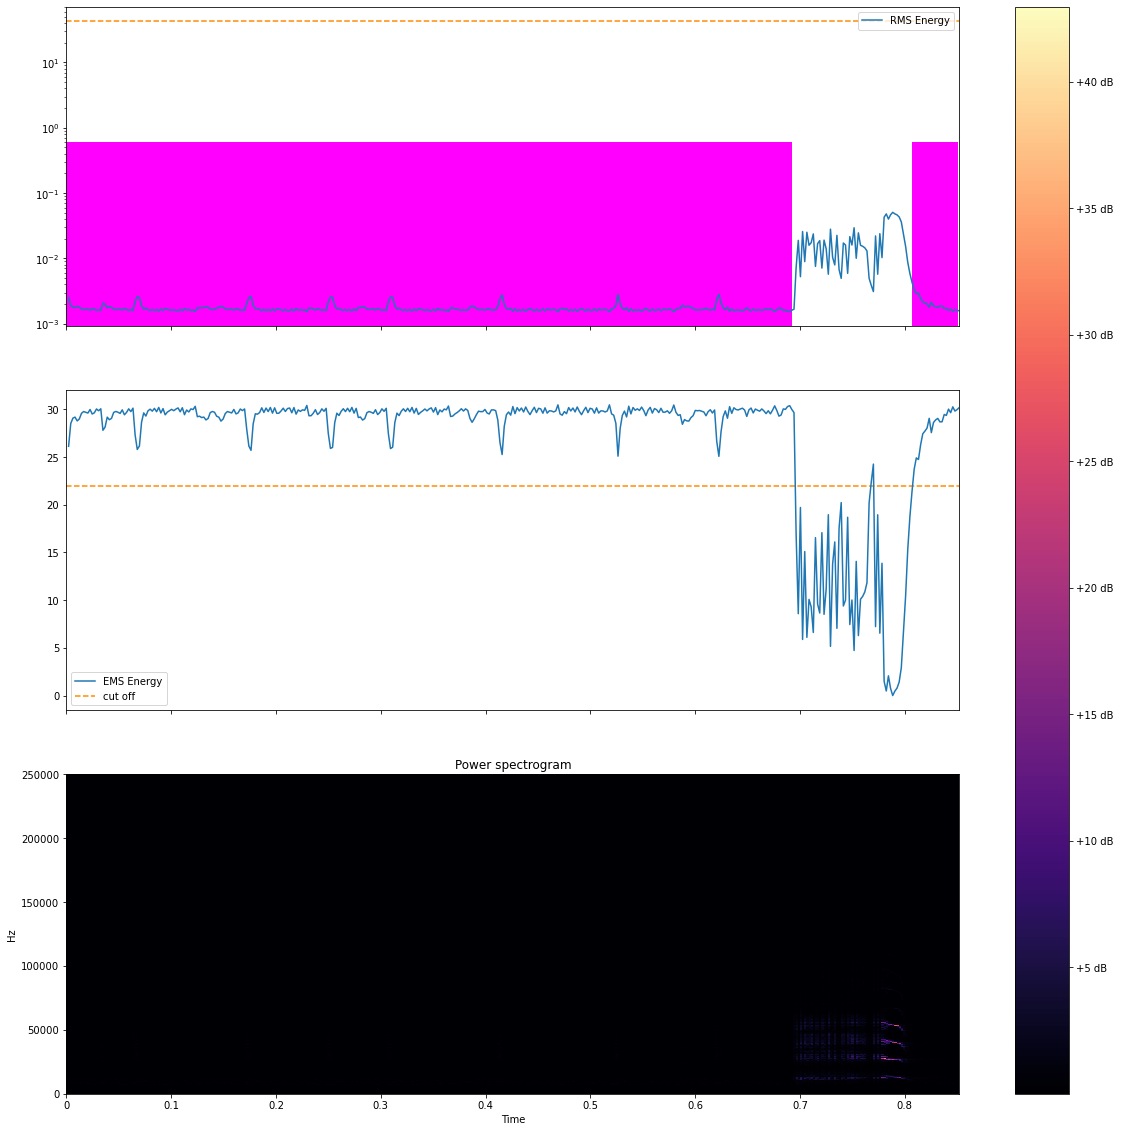

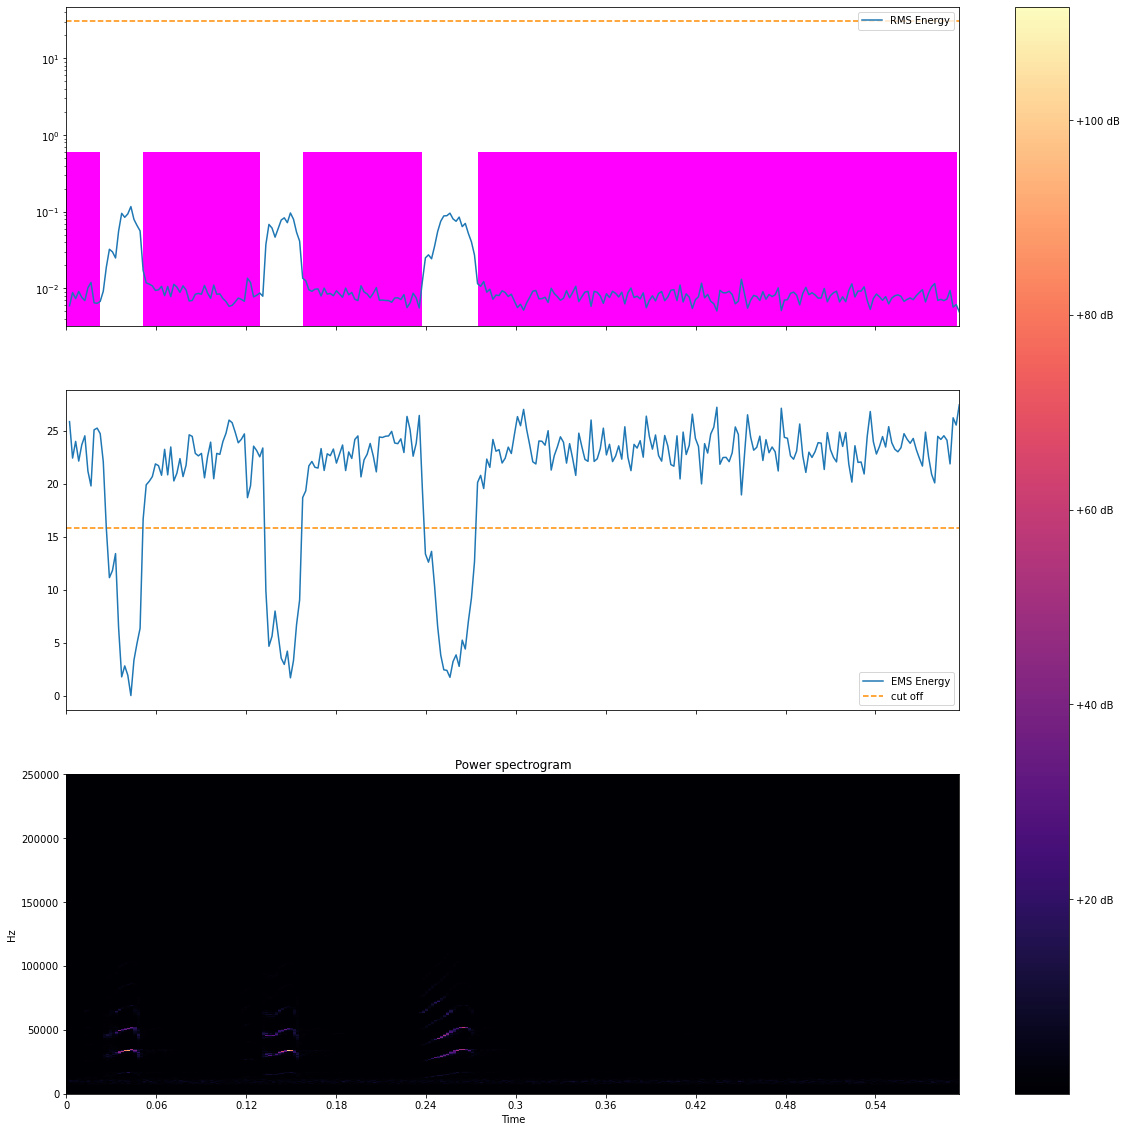

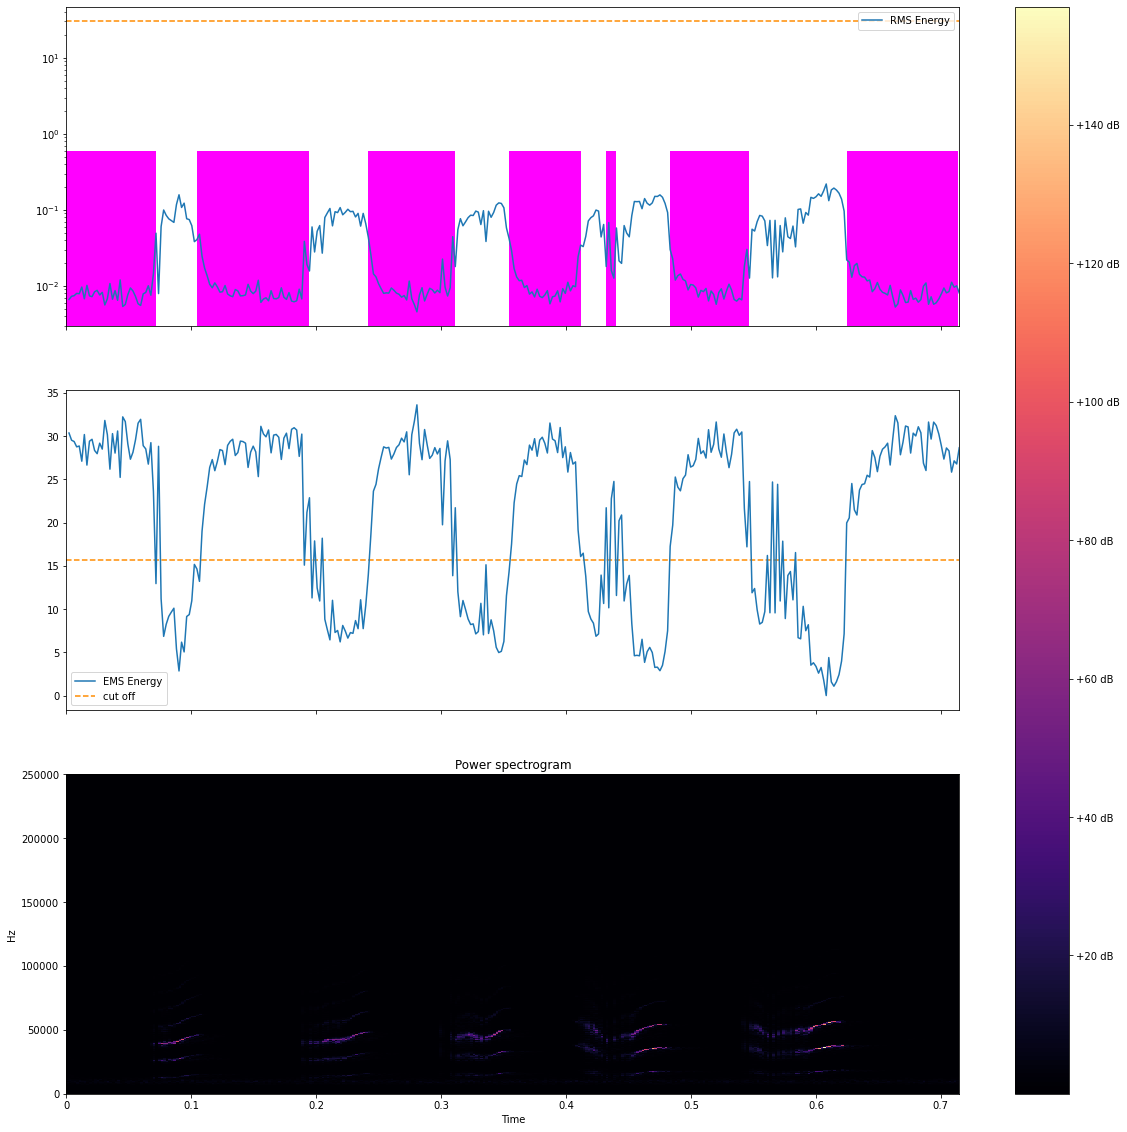

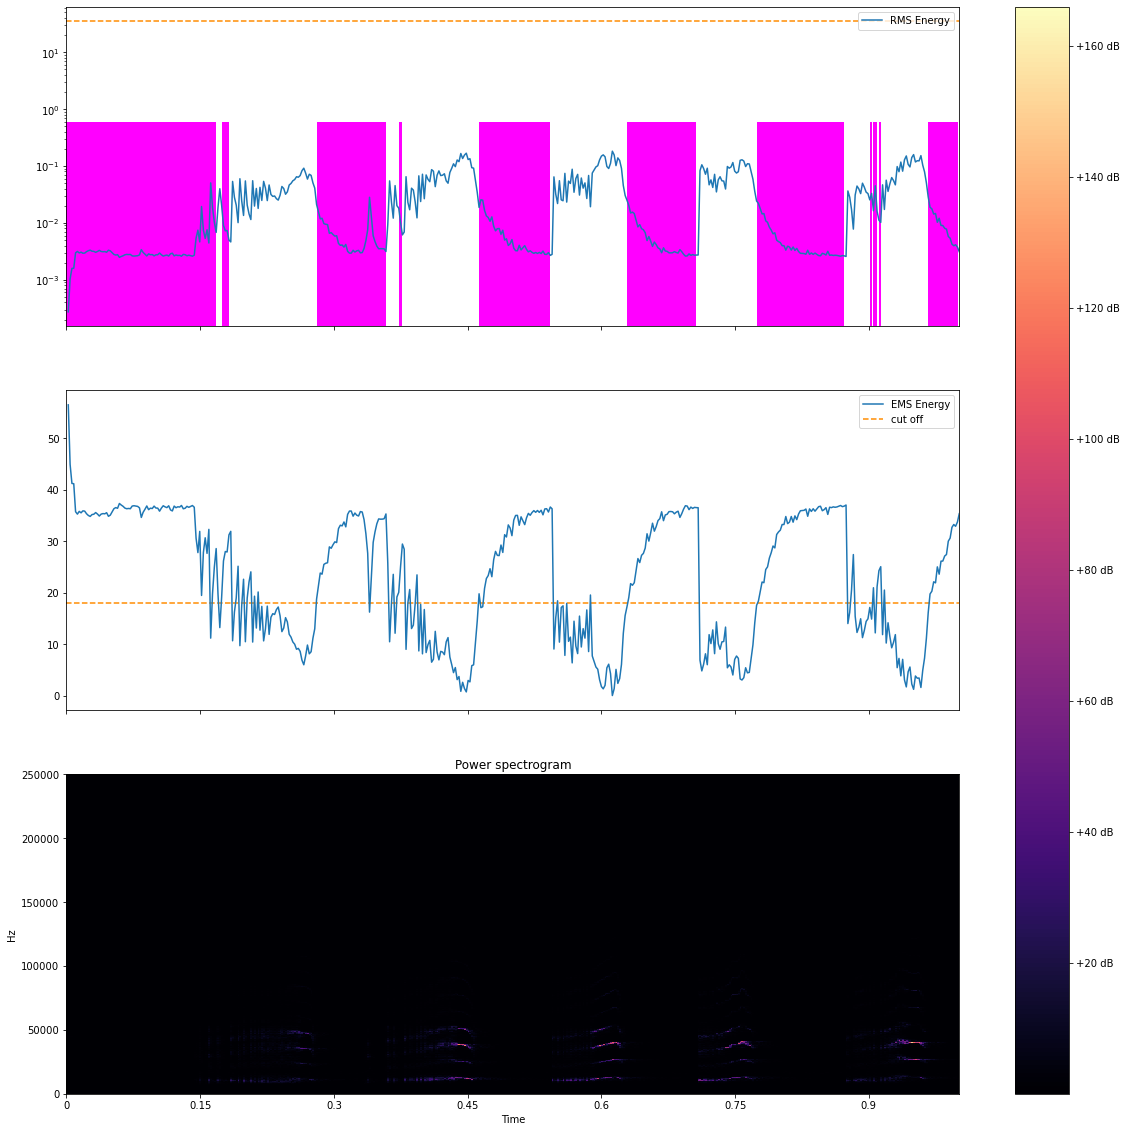

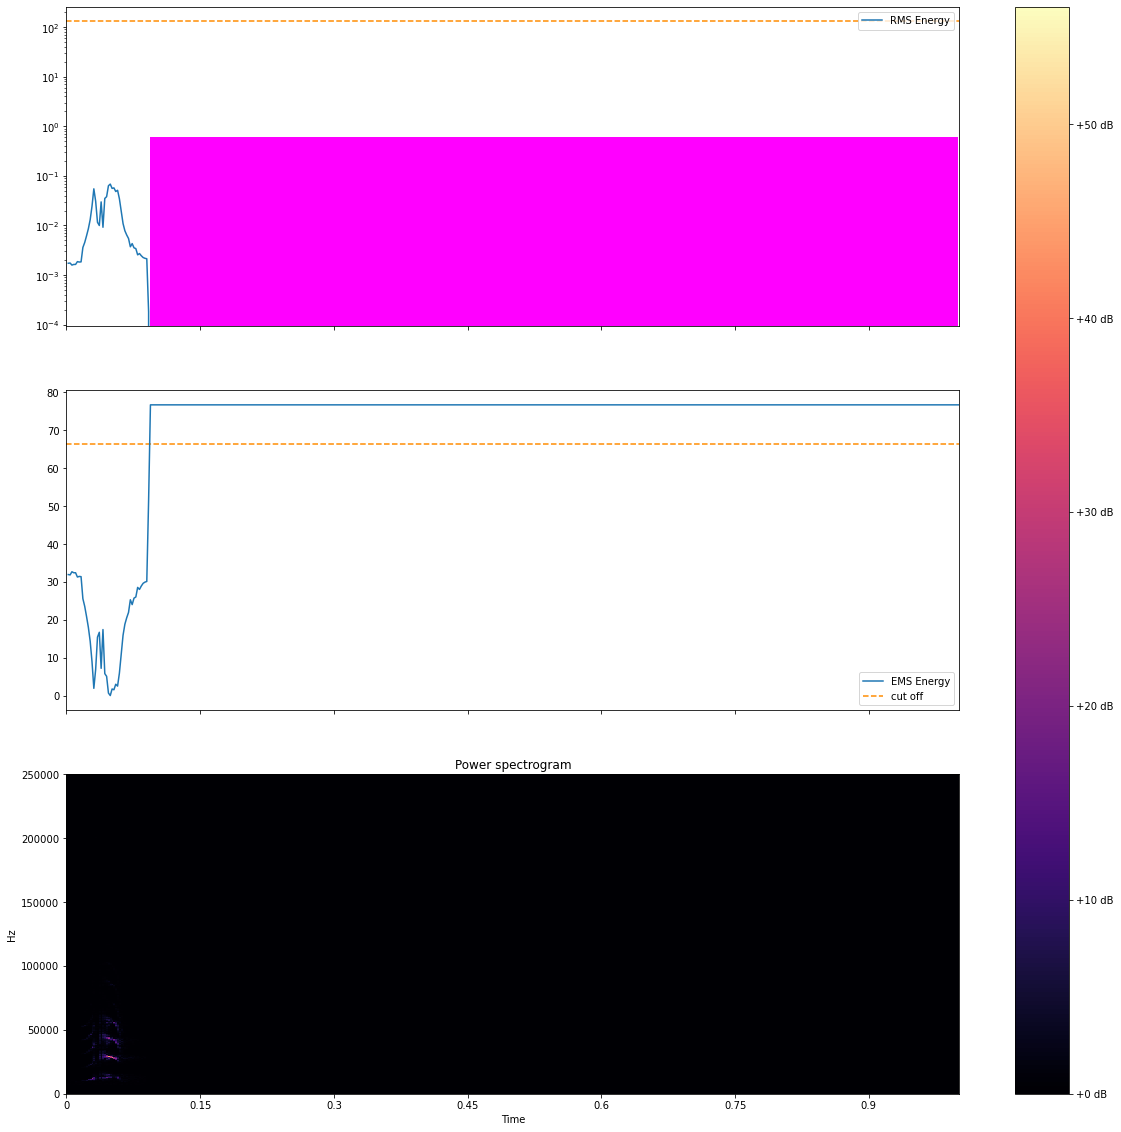

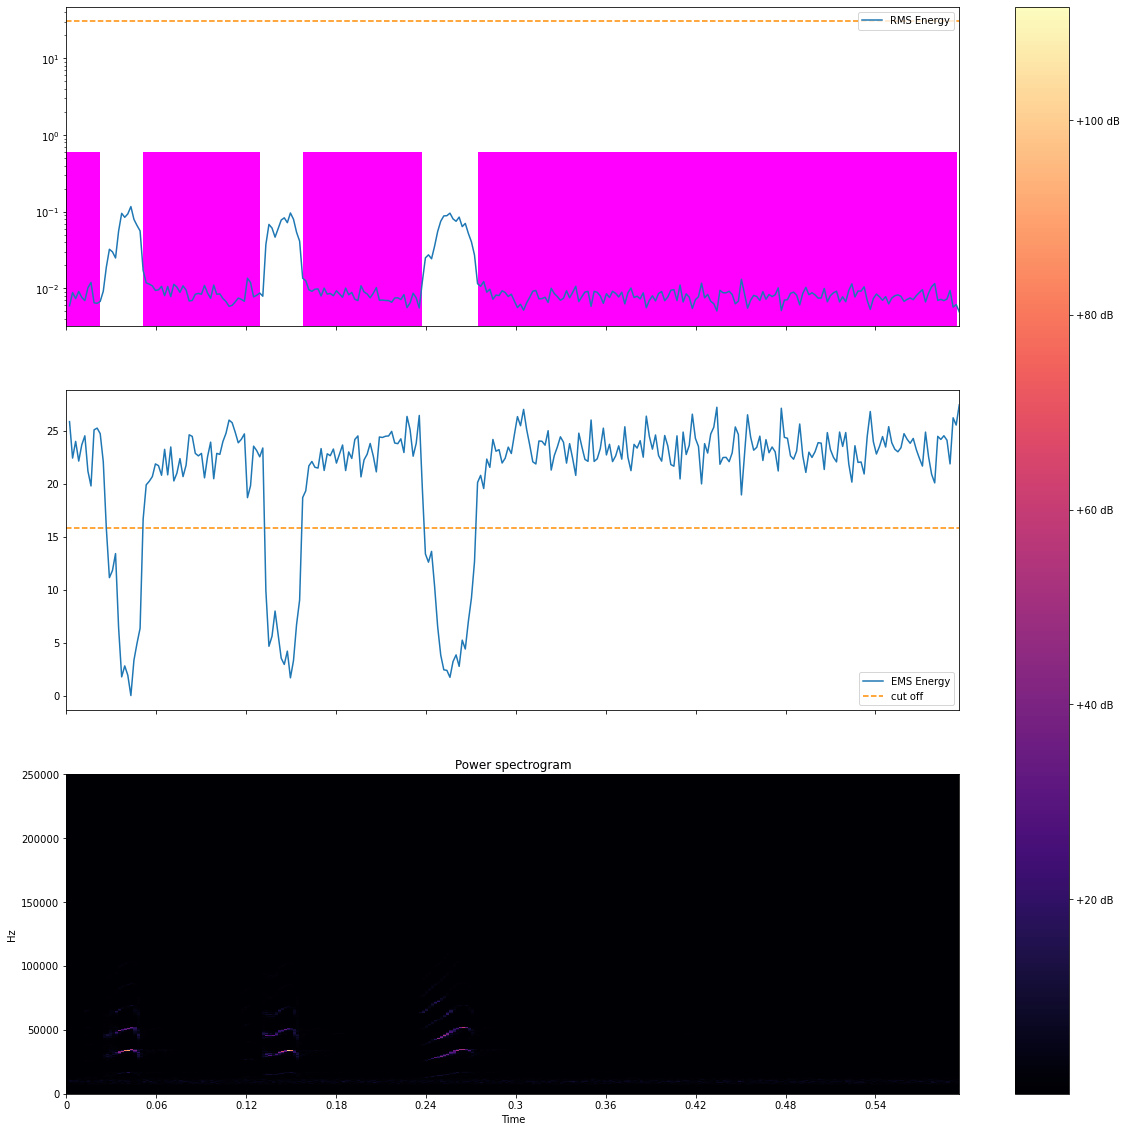

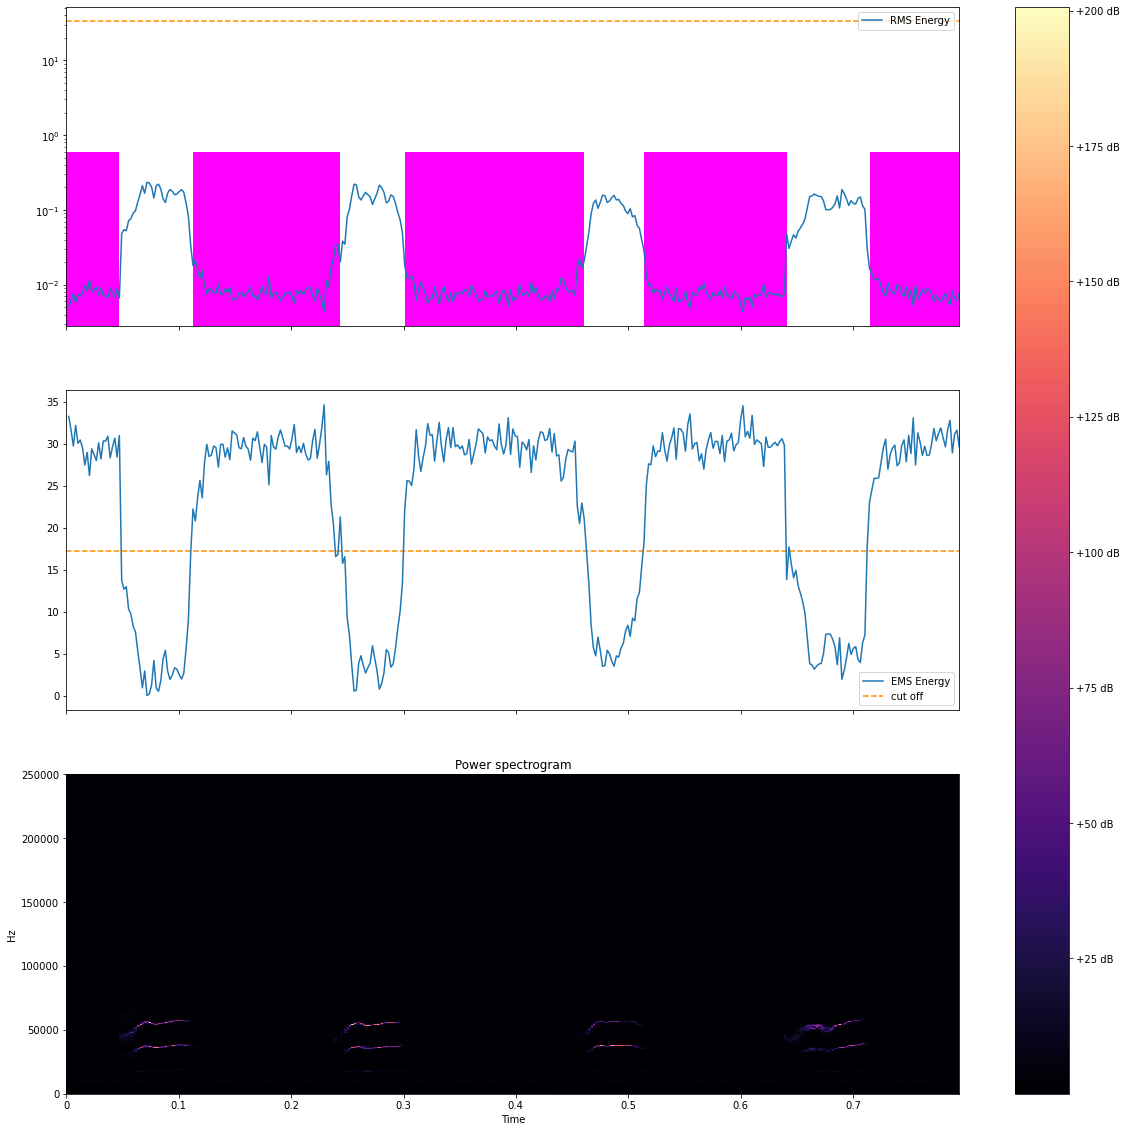

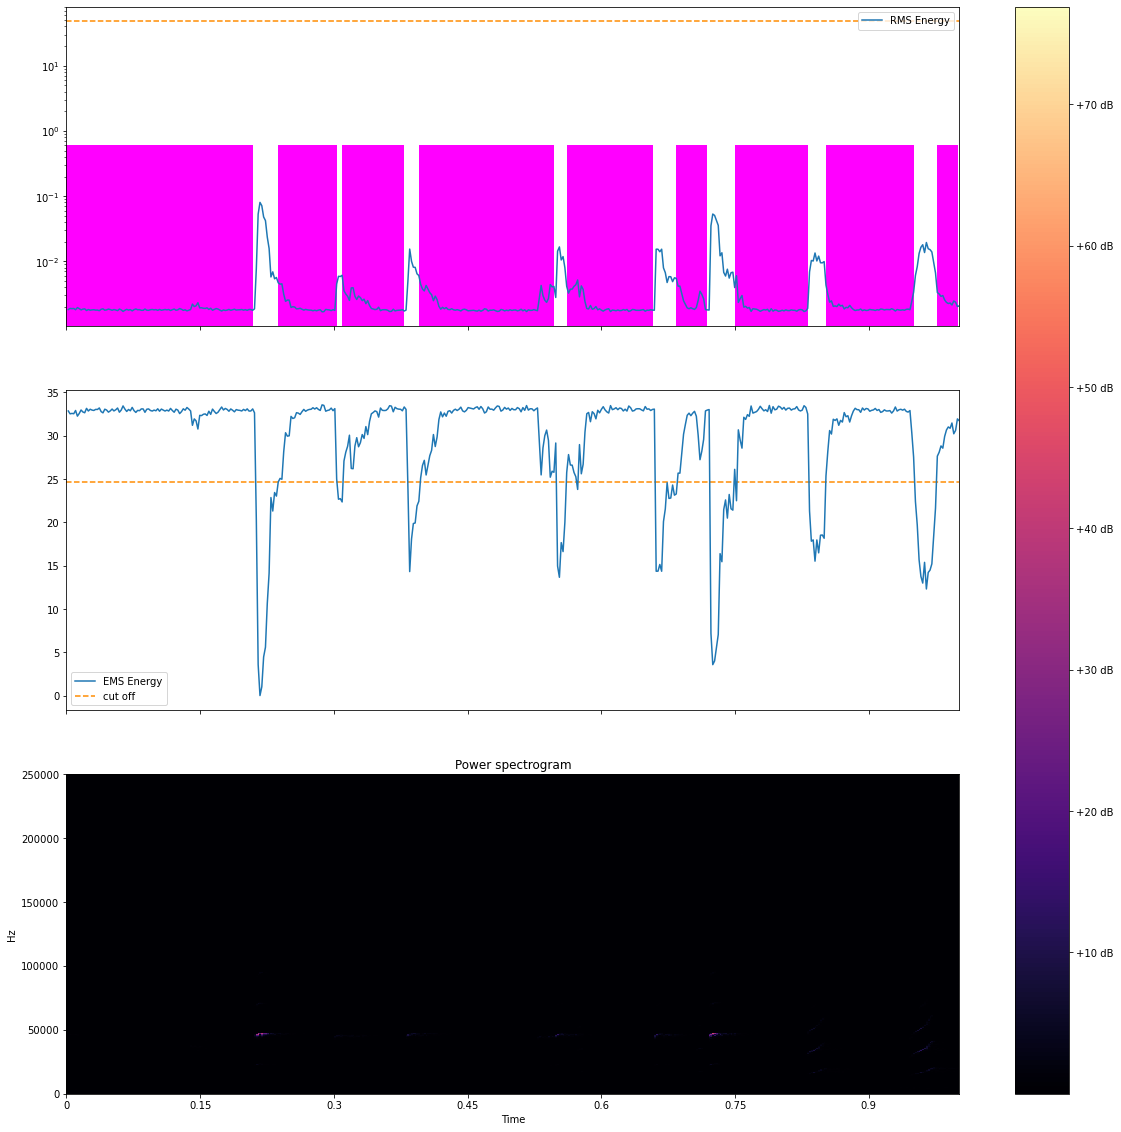

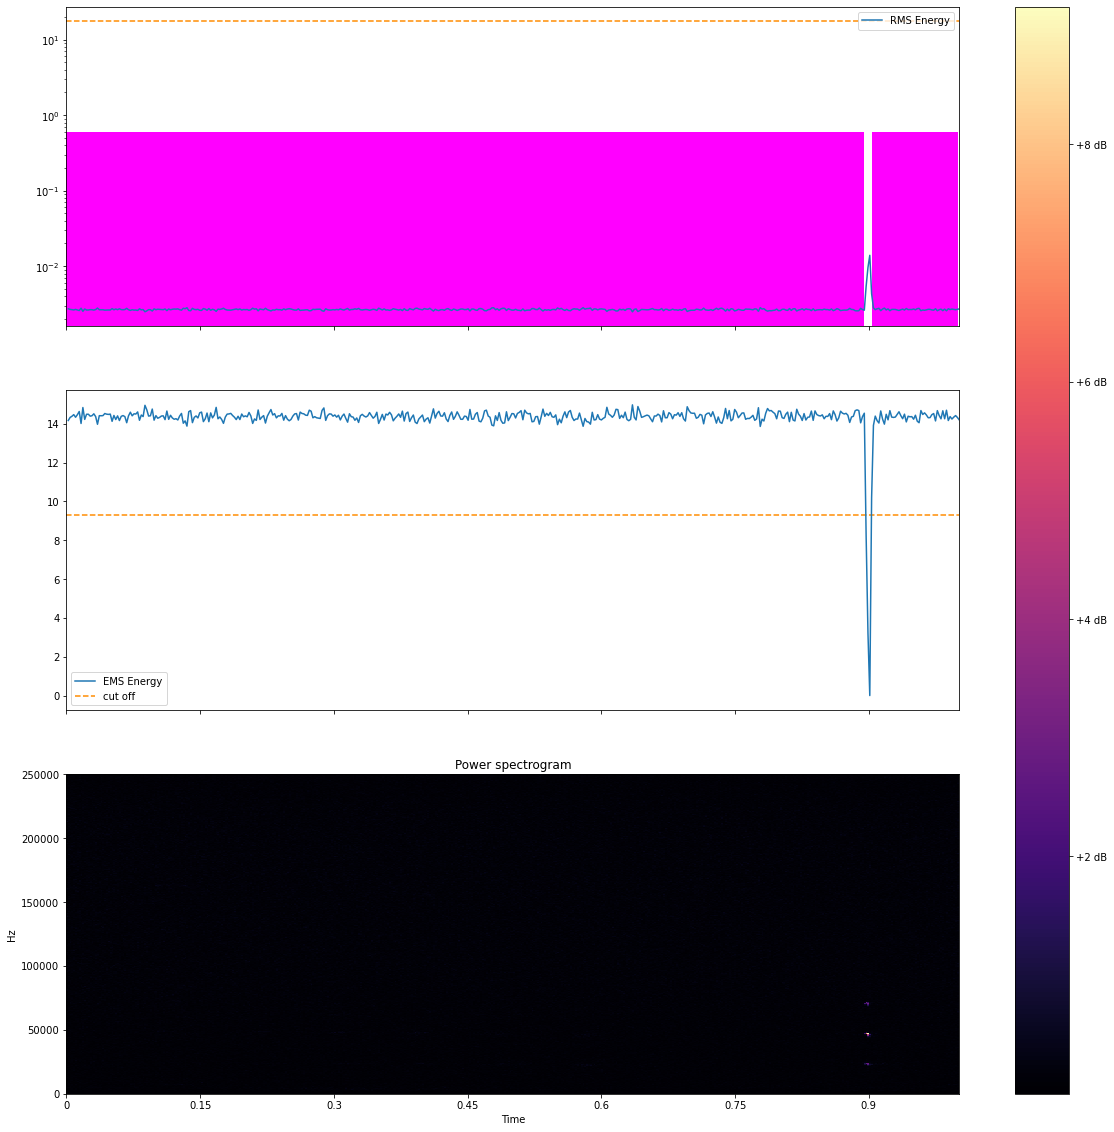

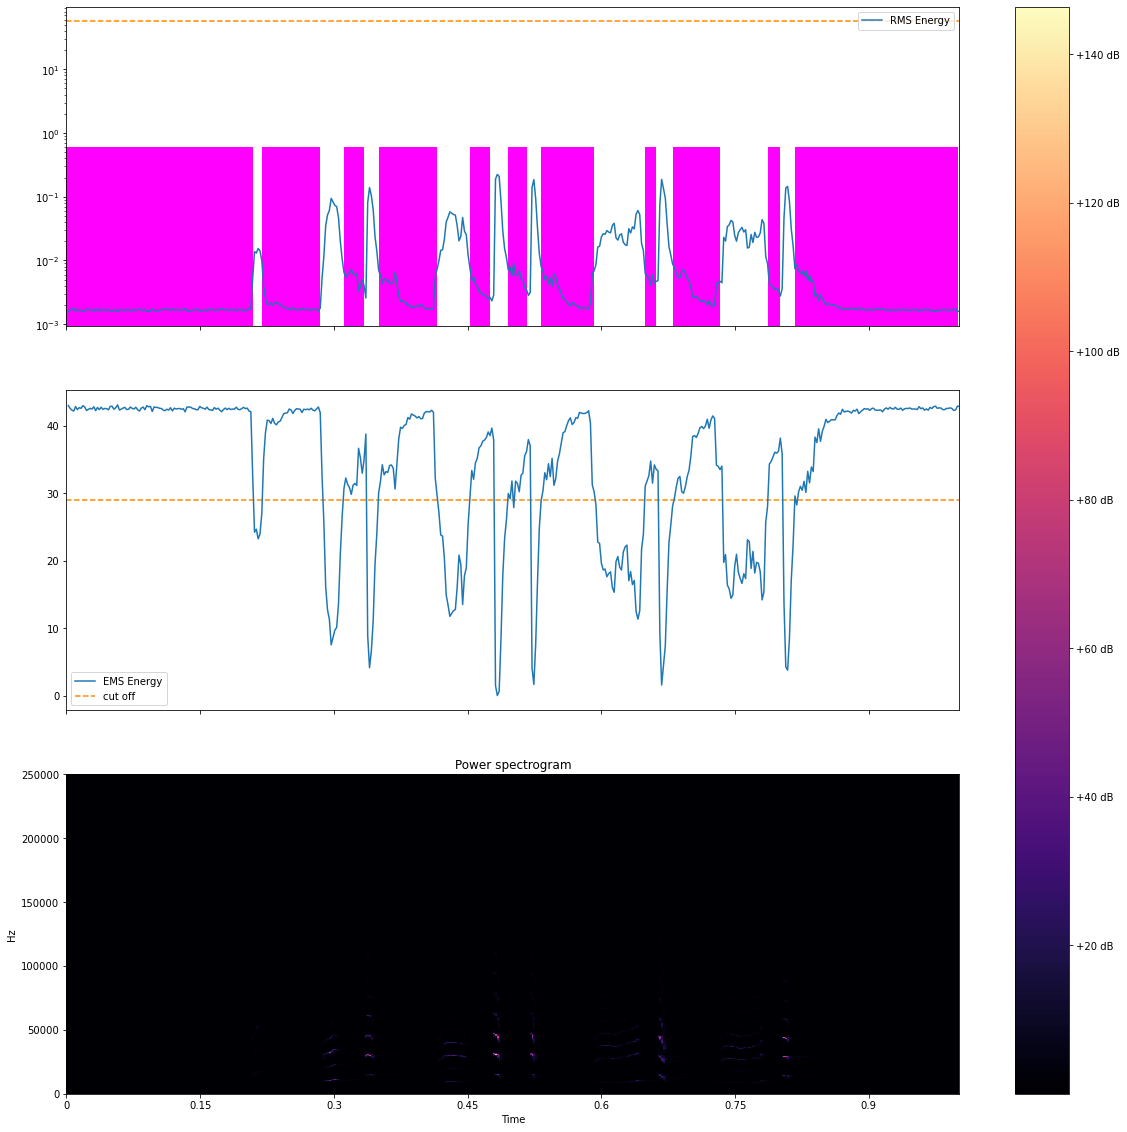

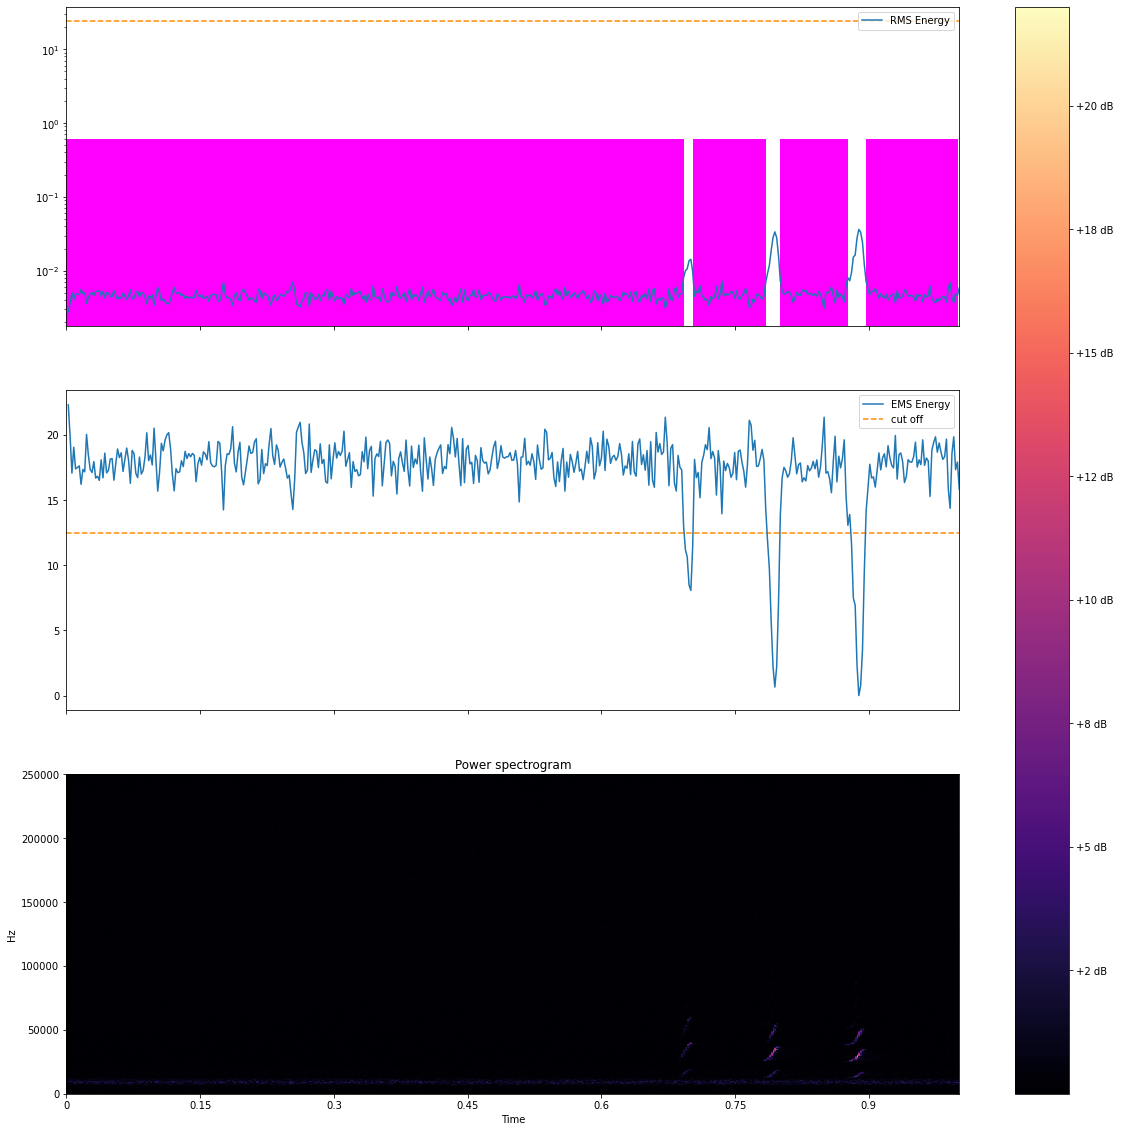

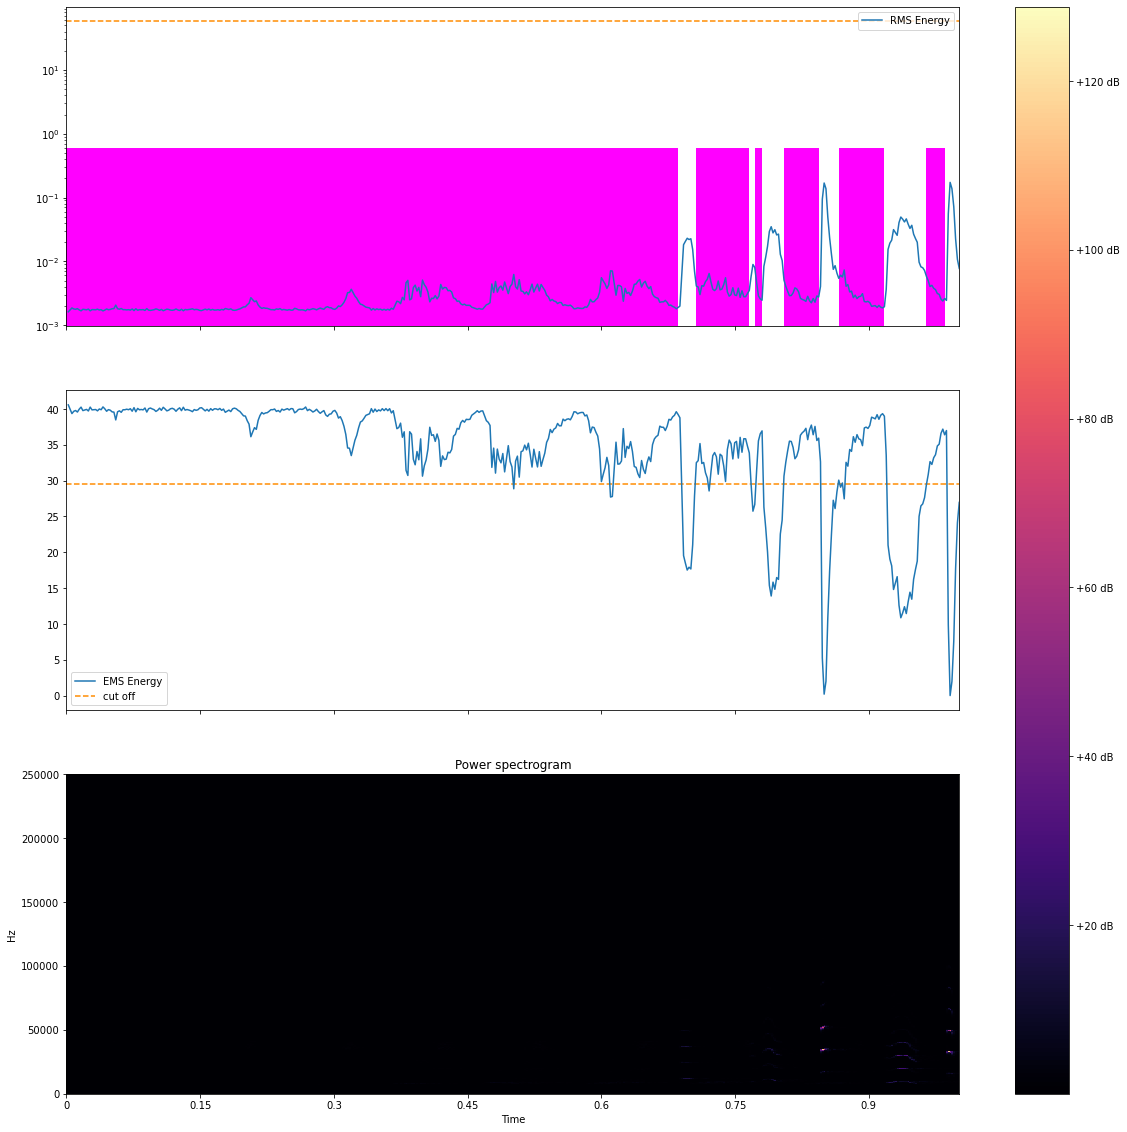

In [35]:
from pathlib import Path
from engine.processing.audio.extractlabel import get_silent_parts


def specshow(S):
    # plt.figure(figsize=(40, 10))
    fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(20, 20))
    specshow_power(ax[0], non_silence_time)
    specshow_ems(ax[1])

    img = librosa.display.specshow(S, y_axis='linear', x_axis='time', ax=ax[2], sr=sr, hop_length=hop_length)
    ax[2].set_title('Power spectrogram')
    fig.colorbar(img, ax=ax, format="%+2.0f dB")
    plt.show()


def specshow_ems(ax):
    times = librosa.times_like(rms, sr=sr, **fft)
    ax.semilogy(times, mse, label='EMS Energy')
    ax.hlines(cut_off, 0, max(times),colors='darkorange',linestyles="dashed",label='cut off')
    ax.set_yscale('linear')
    # ax.set_yticks(list(range(-50,10,1)))
    ax.legend()

i = 0
for file in Path('../data/audio/simpleCall/').glob("*.wav"):
    librosa.cache.clear()
    y, sr = librosa.load(file, sr=500000, duration=1)
    S = librosa.stft(y, **fft)
    max_db = np.max(np.abs(librosa.amplitude_to_db(np.abs(S), ref=np.max, top_db=None)))
    print(max_db)
    rms = librosa.feature.rms(S=S)
    mse = rms ** 2
    mse = librosa.power_to_db(mse.squeeze(), ref=np.max, top_db=None)*-1
    cut_off = np.mean(mse)-5
    non_silence = get_silent_parts(y)
    non_silence_time = librosa.samples_to_time(non_silence, sr=sr)
    specshow(S)
    # break
    if i > 10:
        break
    i+= 1